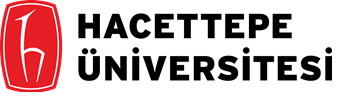

# <u> Meta-analysis of Turkish Energy and Climate Pathways </u>

## By Görkem Güngör and Latife Demirtaş



## Scope and feature overview

The **Türkiye National Energy Plan** (TUEP) modeling horizon is 2035 based on the net-zero target in 2053.

The **pyam** package is used for analyzing, visualizing and working with timeseries data following the format established by the *Integrated Assessment Modeling Consortium* ([IAMC](https://www.iamconsortium.org)); [read the docs](https://pyam-iamc.readthedocs.io/en/stable/data.html) for more information.


## Highlights

The main themes for the **Türkiye National Energy Plan** and the **Türkiye Hydrogen Strategy and Road-Map** modeling horizon 2035 are:

- Final renewable energy includes solar, biomass and geothermal
- Hydrogen and synthetic methane are clean fuels 
- Hydrogen is produced in the electrolyser, whereas DAC using CCS is optional for producing synthetic methane after 2035
- Final natural gas is blended by 3.5% with hydrogen for final sectoral demand after 2035
- Secondary renewable electricity includes solar, wind, hydro, biomass and geothermal
- Although the emissions are not specified, the plan is based on the net-zero carbon emission target for 2053 
- Battery storage has 2 hours charging period.


##  Data

The timeseries data used in this notebook are manually assembled from official reports. The main official report is the *Türkiye National Energy Plan* ([TUEP](https://enerji.gov.tr/Media/Dizin/EIGM/tr/Raporlar/TUEP/T%C3%BCrkiye_National_Energy_Plan.pdf)) of the Ministry of Energy and Natural Resources.

### Scenarios in the database

The scenarios included in the study are:

 - Baseline, Optimistic and Pessimistic Scenarios from Akalın et al. (2012) *Mitigation / Adaptation scenarios and Climate Change policy portfolios for Turkey*
 - Business-as-usual, Mitigation and Net-Zero Scenarios from Calikoglu and Koksal (2023) *A pathway to achieve the net zero emissions target for the public electricity and heat production sector: A case study for Türkiye*
 - Reference and Alternative scenarios from Difiglio et al. (2020) *Turkey Energy Outlook 2020*
 - SSP-RCP scenarios with Feed-in-tariff policy supported by revenues from a carbon tax from Gungor and Sari (2020) *The Role of Nuclear Energy in Transition Pathways of Turkish Energy Sector* 
 - Net-Zero and Delayed Net-Zero Scenarios from Güllü et al. (2023) *Net Zero 2053: A Roadmap for the Turkish Electricity Sector* 
 - Energy Security Scenario from the Ministry of Energy and Natural Resources (2022) *Türkiye National Energy Plan* 
 - Baseline Scenario from Ministry of Environment and Forestry (2007) *First National Communication of Turkey on Climate Change*
 - Baseline, Transition and Transition with High CO2 Tax Scenarios from Taranto et al. (2021) *Socioeconomic impact of the power system transition in Turkey*
 - Baseline and Net-Zero Scenarios from Tör et al. (2022) *Decarbonization Pathway for Turkey: Sectoral Cost-Benefit Analysis (2020-2030)*
 
 <div class="alert alert-warning">

This notebook is intended for meta-analysis of Turkish energy and climate pathways from the literature.

</div>

***

## Capacity projections

The capacity projections from the Ministry of Energy and Natural Resources (2022) *Türkiye National Energy Plan* are compared with *Net-Zero Scenario* from Istanbul Policy Center (2022) and *Alternative Scenario* from from Difiglio et al. (2020).

|Installed capacity|unit|2030|2035|2055|
|----------------|-----|----|----|----|
|Solar power|GW||52.9 (59.7[<sup id="IPC">1</sup>](#fn1-back), 31.8[<sup id="TEO">2</sup>](#fn1-back))||
|Wind power|GW||29.6 (50.1[<sup id="IPC">1</sup>](#fn1-back), 25.0[<sup id="TEO">2</sup>](#fn1-back))||
|Nuclear power|GW||7.2 (4.8[<sup id="IPC">1</sup>](#fn1-back), 7.2[<sup id="TEO">2</sup>](#fn1-back))||
|New installed capacity|GW||96.9||
|Total installed capacity|GW||189.7 (202.1[<sup id="IPC">1</sup>](#fn1-back), 153.7[<sup id="TEO">2</sup>](#fn1-back))||
|Battery storage|GW||7.5||
|Electrolyser|GW|1.9|5.0|70.0|
|Demand side management|GW|0.9|1.7||

[<sup id="IPC">1</sup>](#fn1-back) Net-Zero Scenario from Istanbul Policy Center (2022)

[<sup id="TEO">2</sup>](#fn1-back) Alternative Scenario from from Difiglio et al. (2020)

In [87]:
import numpy as np
import pyam
import matplotlib.pyplot as plt

#### Import data from file and inspect the scenario

We import the snapshot of the timeseries data from the file ``data_rev5.xlsx``.

<div class="alert alert-info">

If you haven't cloned the [GitHub repository](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways.git) to your machine, you can download the file
from GitHub [data](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways/data.csv).  
Make sure to place the file in the same folder as this notebook.

</div>

In [88]:
df = pyam.IamDataFrame(data='data_rev5.xlsx')

pyam.core - INFO: Reading file data_rev5.xlsx


As a first step, we show an overview of the **IamDataFrame** content by simply calling `df` (alternatively, you can use `print(df)` or [df.info()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.info)).

This function returns a concise (abbreviated) overview of the index dimensions and the qualitative/quantitative meta indicators (see an explanation of indicators below).

In [89]:
df

<class 'pyam.core.IamDataFrame'>
Index:
 * model    : Akalın et al. (2012), Calikoglu and Koksal (2023), ... Tör et al. (2022) (10)
 * scenario : Alternative , Baseline , Business-as-usual, CO2 , ... Transition with High CO2 Tax (18)
Timeseries data coordinates:
   region   : Turkey (1)
   variable : Emissions|CO2, Emissions|CO2|Electricity, ... Secondary Energy|Liquids|Other (68)
   unit     : MW, Mt CO2/yr, Mtoe/yr, TWh/yr (4)
   year     : 2010, 2020, 2030, 2040, 2050 (5)
Meta indicators:
   exclude (bool) False (1)

In the following cells, we display the lists of all models, scenarios, regions, and the mapping of variables to  units in the snapshot.

In [90]:
df.model

['Akalın et al. (2012)',
 'Calikoglu and Koksal (2023)',
 'Difiglio et al. (2020)',
 'Gungor and Sari (2020)',
 'Güllü et al. (2023)',
 'MENR (2022)',
 'MoEF (2007)',
 'MoEUCC (2023)',
 'Taranto et al. (2021)',
 'Tör et al. (2022)']

In [91]:
df.scenario

['Alternative ',
 'Baseline ',
 'Business-as-usual',
 'CO2 ',
 'Delayed Net-Zero ',
 'Mitigation ',
 'Net-Zero ',
 'Optimistic ',
 'Pessimistic ',
 'Reference ',
 'SSP1-Baseline-FIT',
 'SSP1-RCP2.6-FIT',
 'SSP2-Baseline-FIT',
 'SSP2-RCP2.6-FIT',
 'SSP3-Baseline-FIT',
 'SSP3-RCP3.4-FIT',
 'Transition',
 'Transition with High CO2 Tax']

In [92]:
df.region

['Turkey']

In [93]:
df.unit_mapping

{'Emissions|CO2': 'Mt CO2/yr',
 'Emissions|CO2|Electricity': 'Mt CO2/yr',
 'Final Energy|Electricity': ['Mtoe/yr', 'TWh/yr'],
 'Final Energy|Electricity|Agriculture': ['Mtoe/yr', 'TWh/yr'],
 'Final Energy|Electricity|Industry': ['Mtoe/yr', 'TWh/yr'],
 'Final Energy|Electricity|Residential': ['Mtoe/yr', 'TWh/yr'],
 'Final Energy|Electricity|Services': 'TWh/yr',
 'Final Energy|Electricity|Transportation': ['Mtoe/yr', 'TWh/yr'],
 'Final Energy|Gases': 'Mtoe/yr',
 'Final Energy|Gases|Agriculture': 'Mtoe/yr',
 'Final Energy|Gases|Industry': 'Mtoe/yr',
 'Final Energy|Gases|Residential': 'Mtoe/yr',
 'Final Energy|Gases|Transportation': 'Mtoe/yr',
 'Final Energy|Heat': 'Mtoe/yr',
 'Final Energy|Hydrogen': 'TWh/yr',
 'Final Energy|Liquids': 'Mtoe/yr',
 'Final Energy|Liquids|Agriculture': 'Mtoe/yr',
 'Final Energy|Liquids|Industry': 'Mtoe/yr',
 'Final Energy|Liquids|Residential': 'Mtoe/yr',
 'Final Energy|Liquids|Transportation': 'Mtoe/yr',
 'Final Energy|Renewables': 'Mtoe/yr',
 'Final Energy|R

We convert the units **Mtoe/yr** and **TWh/yr** to **EJ/yr** compliant with the IAMC template.

In [94]:
df.convert_unit('Mtoe/yr', to='EJ/yr', inplace=True)
df.convert_unit('TWh/yr', to='EJ/yr', inplace=True)
df.convert_unit('MW', to='EJ/yr', inplace=True)

In [95]:
df.unit_mapping

{'Emissions|CO2': 'Mt CO2/yr',
 'Emissions|CO2|Electricity': 'Mt CO2/yr',
 'Final Energy|Electricity': 'EJ/yr',
 'Final Energy|Electricity|Agriculture': 'EJ/yr',
 'Final Energy|Electricity|Industry': 'EJ/yr',
 'Final Energy|Electricity|Residential': 'EJ/yr',
 'Final Energy|Electricity|Services': 'EJ/yr',
 'Final Energy|Electricity|Transportation': 'EJ/yr',
 'Final Energy|Gases': 'EJ/yr',
 'Final Energy|Gases|Agriculture': 'EJ/yr',
 'Final Energy|Gases|Industry': 'EJ/yr',
 'Final Energy|Gases|Residential': 'EJ/yr',
 'Final Energy|Gases|Transportation': 'EJ/yr',
 'Final Energy|Heat': 'EJ/yr',
 'Final Energy|Hydrogen': 'EJ/yr',
 'Final Energy|Liquids': 'EJ/yr',
 'Final Energy|Liquids|Agriculture': 'EJ/yr',
 'Final Energy|Liquids|Industry': 'EJ/yr',
 'Final Energy|Liquids|Residential': 'EJ/yr',
 'Final Energy|Liquids|Transportation': 'EJ/yr',
 'Final Energy|Renewables': 'EJ/yr',
 'Final Energy|Renewables|Agriculture': 'EJ/yr',
 'Final Energy|Renewables|Industry': 'EJ/yr',
 'Final Energy|Re

## Apply interpolation to NA values in the database

The database is checked for ```NA``` values which can be filled with interpolation. The variables are ```Primary Energy```, ```Secondary Energy``` and ```Final Energy```. The interpolation of sub-levels are implemented before their aggregation.

### Primary Energy

In [96]:
df.filter(variable="Primary Energy*", level=2).timeseries()

2010  \
model       scenario  region variable                              unit              
MoEF (2007) Baseline  Turkey Primary Energy|Geothermal|Electricity EJ/yr  0.016747   
                             Primary Energy|Geothermal|Heat        EJ/yr  0.083736   

                                                                              2020  
model       scenario  region variable                              unit             
MoEF (2007) Baseline  Turkey Primary Energy|Geothermal|Electricity EJ/yr  0.016747  
                             Primary Energy|Geothermal|Heat        EJ/yr  0.167472

In [97]:
df.filter(variable="Primary Energy*", level=1).timeseries()

2010  \
model                  scenario     region variable                  unit              
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr       NaN   
                                           Primary Energy|Gas        EJ/yr       NaN   
                                           Primary Energy|Nuclear    EJ/yr       NaN   
                                           Primary Energy|Oil        EJ/yr       NaN   
                                           Primary Energy|Renewables EJ/yr       NaN   
...                                                                              ...   
MoEF (2007)            Baseline     Turkey Primary Energy|Renewables EJ/yr  0.514976   
                                           Primary Energy|Biomass    EJ/yr  0.167472   
                                           Primary Energy|Solar      EJ/yr  0.020934   
                                           Primary Energy|Wind       EJ/yr  0.016747   
                                           Primary Energy|Hydro      EJ/yr  0.209340   

                                                                                2020  \
model                  scenario     region variable                  unit              
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr  1.708214   
                                           Primary Energy|Gas        EJ/yr  1.724962   
                                           Primary Energy|Nuclear    EJ/yr  0.000000   
                                           Primary Energy|Oil        EJ/yr  1.754269   
                                           Primary Energy|Renewables EJ/yr  0.824800   
...                                                                              ...   
MoEF (2007)            Baseline     Turkey Primary Energy|Renewables EJ/yr  0.812239   
                                           Primary Energy|Biomass    EJ/yr  0.167472   
                                           Primary Energy|Solar      EJ/yr  0.041868   
                                           Primary Energy|Wind       EJ/yr  0.041868   
                                           Primary Energy|Hydro      EJ/yr  0.376812   

                                                                                2030  \
model                  scenario     region variable                  unit              
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr  1.750082   
                                           Primary Energy|Gas        EJ/yr  1.532369   
                                           Primary Energy|Nuclear    EJ/yr  0.293076   
                                           Primary Energy|Oil        EJ/yr  1.980356   
                                           Primary Energy|Renewables EJ/yr  1.745896   
...                                                                              ...   
MoEF (2007)            Baseline     Turkey Primary Energy|Renewables EJ/yr       NaN   
                                           Primary Energy|Biomass    EJ/yr       NaN   
                                           Primary Energy|Solar      EJ/yr       NaN   
                                           Primary Energy|Wind       EJ/yr       NaN   
                                           Primary Energy|Hydro      EJ/yr       NaN   

                                                                                2040  \
model                  scenario     region variable                  unit              
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr  1.076008   
                                           Primary Energy|Gas        EJ/yr  1.783577   
                                           Primary Energy|Nuclear    EJ/yr  0.879228   
                                           Primary Energy|Oil        EJ/yr  1.951049   
                                           Primary Energy|Renewables EJ/yr  2.713046   
...                          

As the timeseries is too long to visually inspect, we use the `index` command to check the missing datas.

In [98]:
df.filter(variable="Primary Energy*", level=1).index

MultiIndex([('Difiglio et al. (2020)',      'Alternative '),
            ('Difiglio et al. (2020)',        'Reference '),
            ('Gungor and Sari (2020)', 'SSP1-Baseline-FIT'),
            ('Gungor and Sari (2020)',   'SSP1-RCP2.6-FIT'),
            ('Gungor and Sari (2020)', 'SSP2-Baseline-FIT'),
            ('Gungor and Sari (2020)',   'SSP2-RCP2.6-FIT'),
            ('Gungor and Sari (2020)', 'SSP3-Baseline-FIT'),
            ('Gungor and Sari (2020)',   'SSP3-RCP3.4-FIT'),
            (           'MENR (2022)',              'CO2 '),
            (           'MoEF (2007)',         'Baseline ')],
           names=['model', 'scenario'])

In [99]:
df.filter(variable="Primary Energy*", model="Difiglio et al. (2020)", scenario="Alternative ", level=1).timeseries()

2020  \
model                  scenario     region variable                  unit              
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr  1.708214   
                                           Primary Energy|Gas        EJ/yr  1.724962   
                                           Primary Energy|Nuclear    EJ/yr  0.000000   
                                           Primary Energy|Oil        EJ/yr  1.754269   
                                           Primary Energy|Renewables EJ/yr  0.824800   

                                                                                2030  \
model                  scenario     region variable                  unit              
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr  1.750082   
                                           Primary Energy|Gas        EJ/yr  1.532369   
                                           Primary Energy|Nuclear    EJ/yr  0.293076   
                                           Primary Energy|Oil        EJ/yr  1.980356   
                                           Primary Energy|Renewables EJ/yr  1.745896   

                                                                                2040  
model                  scenario     region variable                  unit             
Difiglio et al. (2020) Alternative  Turkey Primary Energy|Coal       EJ/yr  1.076008  
                                           Primary Energy|Gas        EJ/yr  1.783577  
                                           Primary Energy|Nuclear    EJ/yr  0.879228  
                                           Primary Energy|Oil        EJ/yr  1.951049  
                                           Primary Energy|Renewables EJ/yr  2.713046

In [100]:
df.filter(variable="Primary Energy*", model="Difiglio et al. (2020)", scenario="Reference ", level=1).timeseries()

2020  \
model                  scenario   region variable                  unit              
Difiglio et al. (2020) Reference  Turkey Primary Energy|Coal       EJ/yr  1.708214   
                                         Primary Energy|Gas        EJ/yr  1.724962   
                                         Primary Energy|Nuclear    EJ/yr  0.000000   
                                         Primary Energy|Oil        EJ/yr  1.754269   
                                         Primary Energy|Renewables EJ/yr  0.824800   

                                                                              2030  \
model                  scenario   region variable                  unit              
Difiglio et al. (2020) Reference  Turkey Primary Energy|Coal       EJ/yr  2.198070   
                                         Primary Energy|Gas        EJ/yr  1.628665   
                                         Primary Energy|Nuclear    EJ/yr  0.196780   
                                         Primary Energy|Oil        EJ/yr  2.126894   
                                         Primary Energy|Renewables EJ/yr  1.628665   

                                                                              2040  
model                  scenario   region variable                  unit             
Difiglio et al. (2020) Reference  Turkey Primary Energy|Coal       EJ/yr  2.131081  
                                         Primary Energy|Gas        EJ/yr  2.009664  
                                         Primary Energy|Nuclear    EJ/yr  0.682448  
                                         Primary Energy|Oil        EJ/yr  2.344608  
                                         Primary Energy|Renewables EJ/yr  2.545574

In [101]:
df.filter(variable="Primary Energy*", model="MENR (2022)", scenario="CO2 ", level=1).timeseries()

2020  \
model       scenario region variable                  unit              
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  1.699841   
                            Primary Energy|Gas        EJ/yr  1.666346   
                            Primary Energy|Nuclear    EJ/yr       NaN   
                            Primary Energy|Oil        EJ/yr  1.766830   
                            Primary Energy|Renewables EJ/yr  1.029953   

                                                                 2030  \
model       scenario region variable                  unit              
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  2.005477   
                            Primary Energy|Gas        EJ/yr  1.997104   
                            Primary Energy|Nuclear    EJ/yr  0.334944   
                            Primary Energy|Oil        EJ/yr  2.294366   
                            Primary Energy|Renewables EJ/yr  1.699841   

                                                                 2050  
model       scenario region variable                  unit             
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  0.376812  
                            Primary Energy|Gas        EJ/yr  1.226732  
                            Primary Energy|Nuclear    EJ/yr  3.068924  
                            Primary Energy|Oil        EJ/yr  0.586152  
                            Primary Energy|Renewables EJ/yr  5.233500

We find that the `2040` data are missing in the model `MENR (2022)` and scenario `CO2`. We can interpolate these missing data linearly as there are data in `2030` and `2050` columns.

In [102]:
# The interpolation code is written as a bundle
df_inter = df.filter(variable="Primary Energy*", model="MENR (2022)", scenario="CO2 ", level=1)
df_inter.interpolate(2040, inplace=True)
df = df.filter(model="MENR*", variable='Primary Energy*', keep=False)
df = pyam.concat([df, df_inter])

We can check the results of interpolating by printing the data in the model `MENR (2022)` and scenario `CO2`.

In [103]:
df.filter(variable="Primary Energy*", model="MENR (2022)", scenario="CO2 ", level=1).timeseries()

2020  \
model       scenario region variable                  unit              
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  1.699841   
                            Primary Energy|Gas        EJ/yr  1.666346   
                            Primary Energy|Nuclear    EJ/yr       NaN   
                            Primary Energy|Oil        EJ/yr  1.766830   
                            Primary Energy|Renewables EJ/yr  1.029953   

                                                                 2030  \
model       scenario region variable                  unit              
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  2.005477   
                            Primary Energy|Gas        EJ/yr  1.997104   
                            Primary Energy|Nuclear    EJ/yr  0.334944   
                            Primary Energy|Oil        EJ/yr  2.294366   
                            Primary Energy|Renewables EJ/yr  1.699841   

                                                                 2040  \
model       scenario region variable                  unit              
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  1.191145   
                            Primary Energy|Gas        EJ/yr  1.611918   
                            Primary Energy|Nuclear    EJ/yr  1.701934   
                            Primary Energy|Oil        EJ/yr  1.440259   
                            Primary Energy|Renewables EJ/yr  3.466670   

                                                                 2050  
model       scenario region variable                  unit             
MENR (2022) CO2      Turkey Primary Energy|Coal       EJ/yr  0.376812  
                            Primary Energy|Gas        EJ/yr  1.226732  
                            Primary Energy|Nuclear    EJ/yr  3.068924  
                            Primary Energy|Oil        EJ/yr  0.586152  
                            Primary Energy|Renewables EJ/yr  5.233500

In [104]:
df.filter(variable="Primary Energy*", model="MoEF (2007)", scenario="Baseline ", level=1).timeseries()

2010  \
model       scenario  region variable                  unit              
MoEF (2007) Baseline  Turkey Primary Energy|Biomass    EJ/yr  0.167472   
                             Primary Energy|Coal       EJ/yr  0.975524   
                             Primary Energy|Gas        EJ/yr  0.008374   
                             Primary Energy|Hydro      EJ/yr  0.209340   
                             Primary Energy|Nuclear    EJ/yr       NaN   
                             Primary Energy|Oil        EJ/yr  0.083736   
                             Primary Energy|Renewables EJ/yr  0.514976   
                             Primary Energy|Solar      EJ/yr  0.020934   
                             Primary Energy|Wind       EJ/yr  0.016747   

                                                                  2020  
model       scenario  region variable                  unit             
MoEF (2007) Baseline  Turkey Primary Energy|Biomass    EJ/yr  0.167472  
                             Primary Energy|Coal       EJ/yr  1.561676  
                             Primary Energy|Gas        EJ/yr  0.008374  
                             Primary Energy|Hydro      EJ/yr  0.376812  
                             Primary Energy|Nuclear    EJ/yr  0.334944  
                             Primary Energy|Oil        EJ/yr  0.041868  
                             Primary Energy|Renewables EJ/yr  0.812239  
                             Primary Energy|Solar      EJ/yr  0.041868  
                             Primary Energy|Wind       EJ/yr  0.041868

The next cell illustrates another use case of the **level** filter argument - filtering by `2-` (as string) instead of `2` (as integer) will return all timeseries data for variables *up to* the specified depth.

In [105]:
df.filter(variable='Primary Energy*', level=2).variable

['Primary Energy|Geothermal|Electricity', 'Primary Energy|Geothermal|Heat']

In [106]:
df.filter(variable='Primary Energy*', level='2-').variable

['Primary Energy|Coal',
 'Primary Energy|Gas',
 'Primary Energy|Nuclear',
 'Primary Energy|Oil',
 'Primary Energy|Renewables',
 'Primary Energy|Biomass',
 'Primary Energy|Geothermal',
 'Primary Energy|Solar',
 'Primary Energy|Wind',
 'Primary Energy|Geothermal|Electricity',
 'Primary Energy|Geothermal|Heat',
 'Primary Energy|Hydro']

We aggregate ``Geothermal`` before aggregating the **Primary Energy** sector.

In [107]:
df.aggregate("Primary Energy|Geothermal", append=True)

In [108]:
df.aggregate("Primary Energy", append=True)

Finally we list the index for the models and scenarios including aggregated `Primary Energy` data.

In [109]:
df.filter(variable="Primary Energy").index

MultiIndex([('Difiglio et al. (2020)',      'Alternative '),
            ('Difiglio et al. (2020)',        'Reference '),
            ('Gungor and Sari (2020)', 'SSP1-Baseline-FIT'),
            ('Gungor and Sari (2020)',   'SSP1-RCP2.6-FIT'),
            ('Gungor and Sari (2020)', 'SSP2-Baseline-FIT'),
            ('Gungor and Sari (2020)',   'SSP2-RCP2.6-FIT'),
            ('Gungor and Sari (2020)', 'SSP3-Baseline-FIT'),
            ('Gungor and Sari (2020)',   'SSP3-RCP3.4-FIT'),
            (           'MENR (2022)',              'CO2 '),
            (           'MoEF (2007)',         'Baseline ')],
           names=['model', 'scenario'])

### Secondary Energy

In [110]:
df.filter(variable="Secondary Energy*", level=3).timeseries()

2040  \
model                       scenario  region variable                                  unit              
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Coal|w/ CCS  EJ/yr  0.192528   
                                             Secondary Energy|Electricity|Coal|w/o CCS EJ/yr  0.354432   
                                             Secondary Energy|Electricity|Gas|w/ CCS   EJ/yr  0.014285   
                                             Secondary Energy|Electricity|Gas|w/o CCS  EJ/yr  0.090158   

                                                                                                  2050  \
model                       scenario  region variable                                  unit              
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Coal|w/ CCS  EJ/yr  0.468154   
                                             Secondary Energy|Electricity|Coal|w/o CCS EJ/yr  0.188208   
                                             Secondary Energy|Electricity|Gas|w/ CCS   EJ/yr  0.103395   
                                             Secondary Energy|Electricity|Gas|w/o CCS  EJ/yr  0.042146   

                                                                                                  2020  \
model                       scenario  region variable                                  unit              
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Coal|w/ CCS  EJ/yr       NaN   
                                             Secondary Energy|Electricity|Coal|w/o CCS EJ/yr  0.380923   
                                             Secondary Energy|Electricity|Gas|w/ CCS   EJ/yr       NaN   
                                             Secondary Energy|Electricity|Gas|w/o CCS  EJ/yr  0.255353   

                                                                                                  2030  
model                       scenario  region variable                                  unit             
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Coal|w/ CCS  EJ/yr       NaN  
                                             Secondary Energy|Electricity|Coal|w/o CCS EJ/yr  0.405559  
                                             Secondary Energy|Electricity|Gas|w/ CCS   EJ/yr       NaN  
                                             Secondary Energy|Electricity|Gas|w/o CCS  EJ/yr  0.182048

In [111]:
df.filter(variable="Secondary Energy*", level=2).timeseries()

2010  \
model                       scenario          region variable                                unit          
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr   NaN   
                                                     Secondary Energy|Electricity|Gas        EJ/yr   NaN   
                                                     Secondary Energy|Electricity|Hydro      EJ/yr   NaN   
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr   NaN   
                                                     Secondary Energy|Electricity|Renewables EJ/yr   NaN   
...                                                                                                  ...   
Taranto et al. (2021)       Transition        Turkey Secondary Energy|Electricity|Biomass    EJ/yr   NaN   
                                                     Secondary Energy|Electricity|Other      EJ/yr   NaN   
Tör et al. (2022)           Net-Zero          Turkey Secondary Energy|Electricity|Solar      EJ/yr   NaN   
                                                     Secondary Energy|Electricity|Wind       EJ/yr   NaN   
                            Baseline          Turkey Secondary Energy|Electricity|Gases      EJ/yr   NaN   

                                                                                                        2020  \
model                       scenario          region variable                                unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.380923   
                                                     Secondary Energy|Electricity|Gas        EJ/yr  0.255353   
                                                     Secondary Energy|Electricity|Hydro      EJ/yr  0.281140   
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr       NaN   
                                                     Secondary Energy|Electricity|Renewables EJ/yr  0.057913   
...                                                                                                      ...   
Taranto et al. (2021)       Transition        Turkey Secondary Energy|Electricity|Biomass    EJ/yr       NaN   
                                                     Secondary Energy|Electricity|Other      EJ/yr       NaN   
Tör et al. (2022)           Net-Zero          Turkey Secondary Energy|Electricity|Solar      EJ/yr       NaN   
                                                     Secondary Energy|Electricity|Wind       EJ/yr       NaN   
                            Baseline          Turkey Secondary Energy|Electricity|Gases      EJ/yr       NaN   

                                                                                                        2030  \
model                       scenario          region variable                                unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.611898   
                                                     Secondary Energy|Electricity|Gas        EJ/yr  0.073007   
                                                     Secondary Energy|Electricity|Hydro      EJ/yr  0.336153   
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr  0.142291   
                                                     Secondary Energy|Electricity|Renewables EJ/yr  0.110652   
...                                                                                                      ...   
Taranto et al. (2021)       Transition        Turkey Secondary Energy|Electricity|Biomass    EJ/yr  0.033912   
                                                     Secondary Energy|Electricity|Other      EJ/yr  0.008305   
Tör et al. (2022)           Net-Zero          Turkey Secondary Energy|Electricity|Solar      EJ/yr  0.261000   
      

As the timeseries is too long to visually inspect, we use the `index` command to check the missing datas.

In [112]:
df.filter(variable="Secondary Energy*", level=2).index

MultiIndex([('Calikoglu and Koksal (2023)', 'Business-as-usual'),
            ('Calikoglu and Koksal (2023)',       'Mitigation '),
            ('Calikoglu and Koksal (2023)',         'Net-Zero '),
            (     'Difiglio et al. (2020)',      'Alternative '),
            (     'Difiglio et al. (2020)',        'Reference '),
            (     'Gungor and Sari (2020)', 'SSP1-Baseline-FIT'),
            (     'Gungor and Sari (2020)',   'SSP1-RCP2.6-FIT'),
            (     'Gungor and Sari (2020)', 'SSP2-Baseline-FIT'),
            (     'Gungor and Sari (2020)',   'SSP2-RCP2.6-FIT'),
            (     'Gungor and Sari (2020)', 'SSP3-Baseline-FIT'),
            (     'Gungor and Sari (2020)',   'SSP3-RCP3.4-FIT'),
            (        'Güllü et al. (2023)',         'Net-Zero '),
            (                'MENR (2022)',              'CO2 '),
            (                'MoEF (2007)',         'Baseline '),
            (      'Taranto et al. (2021)',         'Baseline '),
          

In [113]:
df.filter(variable="Secondary Energy*", model="Difiglio et al. (2020)", scenario="Alternative ", level=2).timeseries()

2020  \
model                  scenario     region variable                                unit             
Difiglio et al. (2020) Alternative  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.40680   
                                           Secondary Energy|Electricity|Gases      EJ/yr  0.19836   
                                           Secondary Energy|Electricity|Geothermal EJ/yr  0.02952   
                                           Secondary Energy|Electricity|Hydro      EJ/yr  0.31896   
                                           Secondary Energy|Electricity|Nuclear    EJ/yr  0.00000   
                                           Secondary Energy|Electricity|Oil        EJ/yr  0.00324   
                                           Secondary Energy|Electricity|Renewables EJ/yr  0.01440   
                                           Secondary Energy|Electricity|Solar      EJ/yr  0.03456   
                                           Secondary Energy|Electricity|Wind       EJ/yr  0.07704   

                                                                                             2030  \
model                  scenario     region variable                                unit             
Difiglio et al. (2020) Alternative  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.49932   
                                           Secondary Energy|Electricity|Gases      EJ/yr  0.13068   
                                           Secondary Energy|Electricity|Geothermal EJ/yr  0.09000   
                                           Secondary Energy|Electricity|Hydro      EJ/yr  0.25452   
                                           Secondary Energy|Electricity|Nuclear    EJ/yr  0.09648   
                                           Secondary Energy|Electricity|Oil        EJ/yr  0.00000   
                                           Secondary Energy|Electricity|Renewables EJ/yr  0.02808   
                                           Secondary Energy|Electricity|Solar      EJ/yr  0.13644   
                                           Secondary Energy|Electricity|Wind       EJ/yr  0.19980   

                                                                                             2040  
model                  scenario     region variable                                unit            
Difiglio et al. (2020) Alternative  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.33840  
                                           Secondary Energy|Electricity|Gases      EJ/yr  0.10944  
                                           Secondary Energy|Electricity|Geothermal EJ/yr  0.10188  
                                           Secondary Energy|Electricity|Hydro      EJ/yr  0.24984  
                                           Secondary Energy|Electricity|Nuclear    EJ/yr  0.28944  
                                           Secondary Energy|Electricity|Oil        EJ/yr  0.00000  
                                           Secondary Energy|Electricity|Renewables EJ/yr  0.05112  
                                           Secondary Energy|Electricity|Solar      EJ/yr  0.26892  
                                           Secondary Energy|Electricity|Wind       EJ/yr  0.35892

In [114]:
df.filter(variable="Secondary Energy*", model="Difiglio et al. (2020)", scenario="Reference ", level=2).timeseries()

2020  \
model                  scenario   region variable                                unit             
Difiglio et al. (2020) Reference  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.40680   
                                         Secondary Energy|Electricity|Gases      EJ/yr  0.19836   
                                         Secondary Energy|Electricity|Geothermal EJ/yr  0.02952   
                                         Secondary Energy|Electricity|Hydro      EJ/yr  0.31896   
                                         Secondary Energy|Electricity|Nuclear    EJ/yr  0.00000   
                                         Secondary Energy|Electricity|Oil        EJ/yr  0.00324   
                                         Secondary Energy|Electricity|Renewables EJ/yr  0.01440   
                                         Secondary Energy|Electricity|Solar      EJ/yr  0.03456   
                                         Secondary Energy|Electricity|Wind       EJ/yr  0.07704   

                                                                                           2030  \
model                  scenario   region variable                                unit             
Difiglio et al. (2020) Reference  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.57996   
                                         Secondary Energy|Electricity|Gases      EJ/yr  0.21168   
                                         Secondary Energy|Electricity|Geothermal EJ/yr  0.08748   
                                         Secondary Energy|Electricity|Hydro      EJ/yr  0.25164   
                                         Secondary Energy|Electricity|Nuclear    EJ/yr  0.06444   
                                         Secondary Energy|Electricity|Oil        EJ/yr  0.00000   
                                         Secondary Energy|Electricity|Renewables EJ/yr  0.02772   
                                         Secondary Energy|Electricity|Solar      EJ/yr  0.12168   
                                         Secondary Energy|Electricity|Wind       EJ/yr  0.18180   

                                                                                           2040  
model                  scenario   region variable                                unit            
Difiglio et al. (2020) Reference  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.59796  
                                         Secondary Energy|Electricity|Gases      EJ/yr  0.27288  
                                         Secondary Energy|Electricity|Geothermal EJ/yr  0.08784  
                                         Secondary Energy|Electricity|Hydro      EJ/yr  0.24516  
                                         Secondary Energy|Electricity|Nuclear    EJ/yr  0.22500  
                                         Secondary Energy|Electricity|Oil        EJ/yr  0.00000  
                                         Secondary Energy|Electricity|Renewables EJ/yr  0.04680  
                                         Secondary Energy|Electricity|Solar      EJ/yr  0.24300  
                                         Secondary Energy|Electricity|Wind       EJ/yr  0.33552

In [115]:
df.filter(variable="Secondary Energy*", model="Güllü et al. (2023)", scenario="Net-Zero ", level=2).timeseries()

2050
model               scenario  region variable                       unit          
Güllü et al. (2023) Net-Zero  Turkey Secondary Energy|Gases|Other   EJ/yr  0.31464
                                     Secondary Energy|Liquids|Other EJ/yr  0.06228

In [116]:
df.filter(variable="Secondary Energy*", model="MENR (2022)", scenario="CO2 ", level=2).timeseries()

2020  \
model       scenario region variable                                unit             
MENR (2022) CO2      Turkey Secondary Energy|Electricity|Fossil     EJ/yr  0.63612   
                            Secondary Energy|Electricity|Hydro      EJ/yr  0.28116   
                            Secondary Energy|Electricity|Nuclear    EJ/yr      NaN   
                            Secondary Energy|Electricity|Other      EJ/yr  0.05796   
                            Secondary Energy|Electricity|Renewables EJ/yr  0.46800   
                            Secondary Energy|Electricity|Solar      EJ/yr  0.03960   
                            Secondary Energy|Electricity|Wind       EJ/yr  0.08928   

                                                                              2030  
model       scenario region variable                                unit            
MENR (2022) CO2      Turkey Secondary Energy|Electricity|Fossil     EJ/yr  0.72432  
                            Secondary Energy|Electricity|Hydro      EJ/yr  0.31644  
                            Secondary Energy|Electricity|Nuclear    EJ/yr  0.13392  
                            Secondary Energy|Electricity|Other      EJ/yr  0.07380  
                            Secondary Energy|Electricity|Renewables EJ/yr  0.77148  
                            Secondary Energy|Electricity|Solar      EJ/yr  0.18792  
                            Secondary Energy|Electricity|Wind       EJ/yr  0.19332

In [117]:
df.filter(variable="Secondary Energy*", model="MoEF (2007)", scenario="Baseline ", level=2).timeseries()

2010  \
model       scenario  region variable                                unit            
MoEF (2007) Baseline  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.2376   
                             Secondary Energy|Electricity|Gas        EJ/yr  0.3852   
                             Secondary Energy|Electricity|Nuclear    EJ/yr     NaN   
                             Secondary Energy|Electricity|Oil        EJ/yr  0.0252   
                             Secondary Energy|Electricity|Renewables EJ/yr  0.2232   

                                                                              2020  
model       scenario  region variable                                unit           
MoEF (2007) Baseline  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.5760  
                             Secondary Energy|Electricity|Gas        EJ/yr  0.6012  
                             Secondary Energy|Electricity|Nuclear    EJ/yr  0.1152  
                             Secondary Energy|Electricity|Oil        EJ/yr  0.0216  
                             Secondary Energy|Electricity|Renewables EJ/yr  0.4248

In [118]:
df.filter(variable="Secondary Energy*", model="Taranto et al. (2021)", scenario="Baseline ", level=2).timeseries()

2030  \
model                 scenario  region variable                                unit              
Taranto et al. (2021) Baseline  Turkey Secondary Energy|Electricity|Biomass    EJ/yr  0.000558   
                                       Secondary Energy|Electricity|Coal       EJ/yr  0.498712   
                                       Secondary Energy|Electricity|Gas        EJ/yr  0.432407   
                                       Secondary Energy|Electricity|Geothermal EJ/yr  0.031050   
                                       Secondary Energy|Electricity|Hydro      EJ/yr  0.293954   
                                       Secondary Energy|Electricity|Other      EJ/yr  0.007448   
                                       Secondary Energy|Electricity|Solar      EJ/yr  0.163253   
                                       Secondary Energy|Electricity|Wind       EJ/yr  0.235037   

                                                                                          2040  
model                 scenario  region variable                                unit             
Taranto et al. (2021) Baseline  Turkey Secondary Energy|Electricity|Biomass    EJ/yr  0.000504  
                                       Secondary Energy|Electricity|Coal       EJ/yr  0.600041  
                                       Secondary Energy|Electricity|Gas        EJ/yr  0.531828  
                                       Secondary Energy|Electricity|Geothermal EJ/yr  0.029459  
                                       Secondary Energy|Electricity|Hydro      EJ/yr  0.291143  
                                       Secondary Energy|Electricity|Other      EJ/yr  0.017014  
                                       Secondary Energy|Electricity|Solar      EJ/yr  0.269910  
                                       Secondary Energy|Electricity|Wind       EJ/yr  0.441018

In [119]:
df.filter(variable="Secondary Energy*", model="Taranto et al. (2021)", scenario="Transition", level=2).timeseries()

2030  \
model                 scenario   region variable                                unit              
Taranto et al. (2021) Transition Turkey Secondary Energy|Electricity|Biomass    EJ/yr  0.033912   
                                        Secondary Energy|Electricity|Coal       EJ/yr  0.286308   
                                        Secondary Energy|Electricity|Gas        EJ/yr  0.384458   
                                        Secondary Energy|Electricity|Geothermal EJ/yr  0.046822   
                                        Secondary Energy|Electricity|Hydro      EJ/yr  0.298102   
                                        Secondary Energy|Electricity|Other      EJ/yr  0.008305   
                                        Secondary Energy|Electricity|Solar      EJ/yr  0.178913   
                                        Secondary Energy|Electricity|Wind       EJ/yr  0.273949   

                                                                                           2040  
model                 scenario   region variable                                unit             
Taranto et al. (2021) Transition Turkey Secondary Energy|Electricity|Biomass    EJ/yr  0.042271  
                                        Secondary Energy|Electricity|Coal       EJ/yr  0.324119  
                                        Secondary Energy|Electricity|Gas        EJ/yr  0.375865  
                                        Secondary Energy|Electricity|Geothermal EJ/yr  0.044168  
                                        Secondary Energy|Electricity|Hydro      EJ/yr  0.365969  
                                        Secondary Energy|Electricity|Other      EJ/yr  0.015390  
                                        Secondary Energy|Electricity|Solar      EJ/yr  0.270151  
                                        Secondary Energy|Electricity|Wind       EJ/yr  0.454100

In [120]:
df.filter(variable="Secondary Energy*", model="Tör et al. (2022)", scenario="Baseline ", level=2).timeseries()

,,,,,2050
model,scenario,region,variable,unit,
Tör et al. (2022),Baseline,Turkey,Secondary Energy|Electricity|Gases,EJ/yr,0.135


In [121]:
df.filter(variable="Secondary Energy*", model="Tör et al. (2022)", scenario="Net-Zero ", level=2).timeseries()

2030  \
model             scenario  region variable                           unit           
Tör et al. (2022) Net-Zero  Turkey Secondary Energy|Electricity|Solar EJ/yr  0.261   
                                   Secondary Energy|Electricity|Wind  EJ/yr  0.324   

                                                                               2050  
model             scenario  region variable                           unit           
Tör et al. (2022) Net-Zero  Turkey Secondary Energy|Electricity|Solar EJ/yr  1.3032  
                                   Secondary Energy|Electricity|Wind  EJ/yr  0.5256

We can interpolate the missing data for year `2040` in the model `Tör et al. (2022)`and scenario `Net-Zero`.

In [122]:
# The interpolation code is written as a bundle
df_inter = df.filter(variable="Secondary Energy*", model="Tör et al. (2022)", scenario="Net-Zero ", level=2)
df_inter.interpolate(2040, inplace=True)
df = df.filter(variable="Secondary Energy*", model="Tör et al. (2022)", scenario="Net-Zero ", level=2, keep=False)
df = pyam.concat([df, df_inter])

We can check the results of interpolating by printing the data in the model `Tör et al. (2022)`and scenario `Net-Zero`.

In [123]:
df.filter(variable="Secondary Energy*", model="Tör et al. (2022)", scenario="Net-Zero ", level=2).timeseries()

2030  \
model             scenario  region variable                           unit           
Tör et al. (2022) Net-Zero  Turkey Secondary Energy|Electricity|Solar EJ/yr  0.261   
                                   Secondary Energy|Electricity|Wind  EJ/yr  0.324   

                                                                               2040  \
model             scenario  region variable                           unit            
Tör et al. (2022) Net-Zero  Turkey Secondary Energy|Electricity|Solar EJ/yr  0.7821   
                                   Secondary Energy|Electricity|Wind  EJ/yr  0.4248   

                                                                               2050  
model             scenario  region variable                           unit           
Tör et al. (2022) Net-Zero  Turkey Secondary Energy|Electricity|Solar EJ/yr  1.3032  
                                   Secondary Energy|Electricity|Wind  EJ/yr  0.5256

In [124]:
df.filter(variable="Secondary Energy*", scenario="Business-as-usual",model="Calikoglu and Koksal (2023)", level=2).timeseries()

2020  \
model                       scenario          region variable                                unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.380923   
                                                     Secondary Energy|Electricity|Gas        EJ/yr  0.255353   
                                                     Secondary Energy|Electricity|Hydro      EJ/yr  0.281140   
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr       NaN   
                                                     Secondary Energy|Electricity|Renewables EJ/yr  0.057913   
                                                     Secondary Energy|Electricity|Solar      EJ/yr  0.039421   
                                                     Secondary Energy|Electricity|Wind       EJ/yr  0.089382   

                                                                                                        2030  \
model                       scenario          region variable                                unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.611898   
                                                     Secondary Energy|Electricity|Gas        EJ/yr  0.073007   
                                                     Secondary Energy|Electricity|Hydro      EJ/yr  0.336153   
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr  0.142291   
                                                     Secondary Energy|Electricity|Renewables EJ/yr  0.110652   
                                                     Secondary Energy|Electricity|Solar      EJ/yr  0.101861   
                                                     Secondary Energy|Electricity|Wind       EJ/yr  0.208138   

                                                                                                        2040  \
model                       scenario          region variable                                unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.892546   
                                                     Secondary Energy|Electricity|Gas        EJ/yr  0.132845   
                                                     Secondary Energy|Electricity|Hydro      EJ/yr  0.349736   
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr  0.142291   
                                                     Secondary Energy|Electricity|Renewables EJ/yr  0.136196   
                                                     Secondary Energy|Electricity|Solar      EJ/yr  0.161779   
                                                     Secondary Energy|Electricity|Wind       EJ/yr  0.312206   

                                                                                                        2050  
model                       scenario          region variable                                unit             
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Coal       EJ/yr  1.204449  
                                                     Secondary Energy|Electricity|Gas        EJ/yr  0.104407  
                                                     Secondary Energy|Electricity|Hydro      EJ/yr  0.351942  
                                                     Secondary Energy|Electricity|Nuclear    EJ/yr  0.142291  
                                                     Secondary Energy|Electricity|Renewables EJ/yr  0.161740  
                                                     Secondary Energy|Electricity|Solar      EJ/yr  0.221698  
                                                     Secondary Energy|Electricity|Wind       EJ/yr  0.416275

In [125]:
df.filter(variable="Secondary Energy*", scenario="Mitigation ",model="Calikoglu and Koksal (2023)", level=2).timeseries()

2020  \
model                       scenario    region variable                                unit              
Calikoglu and Koksal (2023) Mitigation  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.380923   
                                               Secondary Energy|Electricity|Gas        EJ/yr  0.255353   
                                               Secondary Energy|Electricity|Hydro      EJ/yr  0.281140   
                                               Secondary Energy|Electricity|Nuclear    EJ/yr       NaN   
                                               Secondary Energy|Electricity|Renewables EJ/yr  0.057913   
                                               Secondary Energy|Electricity|Solar      EJ/yr  0.039421   
                                               Secondary Energy|Electricity|Wind       EJ/yr  0.089382   

                                                                                                  2030  \
model                       scenario    region variable                                unit              
Calikoglu and Koksal (2023) Mitigation  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.589390   
                                               Secondary Energy|Electricity|Gas        EJ/yr  0.048439   
                                               Secondary Energy|Electricity|Hydro      EJ/yr  0.341041   
                                               Secondary Energy|Electricity|Nuclear    EJ/yr  0.175491   
                                               Secondary Energy|Electricity|Renewables EJ/yr  0.110652   
                                               Secondary Energy|Electricity|Solar      EJ/yr  0.110849   
                                               Secondary Energy|Electricity|Wind       EJ/yr  0.208138   

                                                                                                  2040  \
model                       scenario    region variable                                unit              
Calikoglu and Koksal (2023) Mitigation  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.691802   
                                               Secondary Energy|Electricity|Gas        EJ/yr  0.079878   
                                               Secondary Energy|Electricity|Hydro      EJ/yr  0.347053   
                                               Secondary Energy|Electricity|Nuclear    EJ/yr  0.307703   
                                               Secondary Energy|Electricity|Renewables EJ/yr  0.136196   
                                               Secondary Energy|Electricity|Solar      EJ/yr  0.200727   
                                               Secondary Energy|Electricity|Wind       EJ/yr  0.364241   

                                                                                                  2050  
model                       scenario    region variable                                unit             
Calikoglu and Koksal (2023) Mitigation  Turkey Secondary Energy|Electricity|Coal       EJ/yr  0.776400  
                                               Secondary Energy|Electricity|Gas        EJ/yr  0.096241  
                                               Secondary Energy|Electricity|Hydro      EJ/yr  0.351942  
                                               Secondary Energy|Electricity|Nuclear    EJ/yr  0.405528  
                                               Secondary Energy|Electricity|Renewables EJ/yr  0.161740  
                                               Secondary Energy|Electricity|Solar      EJ/yr  0.290604  
                                               Secondary Energy|Electricity|Wind       EJ/yr  0.520344

In [126]:
df.filter(variable="Secondary Energy*", scenario="Net-Zero ",model="Calikoglu and Koksal (2023)", level=2).timeseries()

2020  \
model                       scenario  region variable                                unit              
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Hydro      EJ/yr  0.281140   
                                             Secondary Energy|Electricity|Nuclear    EJ/yr       NaN   
                                             Secondary Energy|Electricity|Renewables EJ/yr  0.057913   
                                             Secondary Energy|Electricity|Solar      EJ/yr  0.039421   
                                             Secondary Energy|Electricity|Wind       EJ/yr  0.089382   

                                                                                                2030  \
model                       scenario  region variable                                unit              
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Hydro      EJ/yr  0.350818   
                                             Secondary Energy|Electricity|Nuclear    EJ/yr  0.175491   
                                             Secondary Energy|Electricity|Renewables EJ/yr  0.124134   
                                             Secondary Energy|Electricity|Solar      EJ/yr  0.137813   
                                             Secondary Energy|Electricity|Wind       EJ/yr  0.208138   

                                                                                                2040  \
model                       scenario  region variable                                unit              
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Hydro      EJ/yr  0.351942   
                                             Secondary Energy|Electricity|Nuclear    EJ/yr  0.307703   
                                             Secondary Energy|Electricity|Renewables EJ/yr  0.176641   
                                             Secondary Energy|Electricity|Solar      EJ/yr  0.317568   
                                             Secondary Energy|Electricity|Wind       EJ/yr  0.520344   

                                                                                                2050  
model                       scenario  region variable                                unit             
Calikoglu and Koksal (2023) Net-Zero  Turkey Secondary Energy|Electricity|Hydro      EJ/yr  0.351942  
                                             Secondary Energy|Electricity|Nuclear    EJ/yr  0.761254  
                                             Secondary Energy|Electricity|Renewables EJ/yr  0.229029  
                                             Secondary Energy|Electricity|Solar      EJ/yr  0.497323  
                                             Secondary Energy|Electricity|Wind       EJ/yr  0.832549

In [127]:
df.filter(variable="Secondary Energy*", level=1).timeseries()

,,,,,2050
model,scenario,region,variable,unit,
Güllü et al. (2023),Net-Zero,Turkey,Secondary Energy|Hydrogen,EJ/yr,0.39492


In [128]:
df.filter(variable='Secondary Energy*', level='3-').variable

['Secondary Energy|Electricity|Coal',
 'Secondary Energy|Electricity|Gas',
 'Secondary Energy|Electricity|Hydro',
 'Secondary Energy|Electricity|Nuclear',
 'Secondary Energy|Electricity|Renewables',
 'Secondary Energy|Electricity|Solar',
 'Secondary Energy|Electricity|Wind',
 'Secondary Energy|Electricity|Coal|w/ CCS',
 'Secondary Energy|Electricity|Coal|w/o CCS',
 'Secondary Energy|Electricity|Gas|w/ CCS',
 'Secondary Energy|Electricity|Gas|w/o CCS',
 'Secondary Energy|Electricity|Gases',
 'Secondary Energy|Electricity|Geothermal',
 'Secondary Energy|Electricity|Oil',
 'Secondary Energy|Electricity|Biomass',
 'Secondary Energy|Gases|Other',
 'Secondary Energy|Hydrogen',
 'Secondary Energy|Liquids|Other',
 'Secondary Energy|Electricity|Fossil',
 'Secondary Energy|Electricity|Other']

In [129]:
df.aggregate?

We aggregate the `Secondary Energy|Electricity` recursively to include `CCS` sector.

In [130]:
df.aggregate("Secondary Energy|Electricity", append=True, recursive=True)

Finally we list the index for the models and scenarios including aggregated `Secondary Energy|Electricity` data.

In [131]:
df.filter(variable="Secondary Energy|Electricity").index

MultiIndex([('Calikoglu and Koksal (2023)', 'Business-as-usual'),
            ('Calikoglu and Koksal (2023)',       'Mitigation '),
            ('Calikoglu and Koksal (2023)',         'Net-Zero '),
            (     'Difiglio et al. (2020)',      'Alternative '),
            (     'Difiglio et al. (2020)',        'Reference '),
            (     'Gungor and Sari (2020)', 'SSP1-Baseline-FIT'),
            (     'Gungor and Sari (2020)',   'SSP1-RCP2.6-FIT'),
            (     'Gungor and Sari (2020)', 'SSP2-Baseline-FIT'),
            (     'Gungor and Sari (2020)',   'SSP2-RCP2.6-FIT'),
            (     'Gungor and Sari (2020)', 'SSP3-Baseline-FIT'),
            (     'Gungor and Sari (2020)',   'SSP3-RCP3.4-FIT'),
            (                'MENR (2022)',              'CO2 '),
            (                'MoEF (2007)',         'Baseline '),
            (      'Taranto et al. (2021)',         'Baseline '),
            (      'Taranto et al. (2021)',        'Transition'),
          

## Perform scenario diagnostic and validation checks

When analyzing scenario results, it is often useful to check whether certain timeseries data exist or the values are within a specific range.
For example, it may make sense to ensure that reported data for historical periods are close to established reference data or that near-term developments are reasonable.

Before diving into the diagnostics and validation features, we need to briefly introduce the 'meta' table.
This attribute of an **IamDataFrame** is a [pandas.DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html), which can be used to store categorization information and quantitative indicators of each model-scenario.
Per default, a new **IamDataFrame** will contain a column `exclude`, which is set to `False` for all model-scenarios.

The next cell shows the first 10 rows of the 'meta' table.

In [132]:
df.meta.head()

exclude
model                       scenario                  
Akalın et al. (2012)        Baseline             False
                            Optimistic           False
                            Pessimistic          False
Calikoglu and Koksal (2023) Business-as-usual    False
                            Mitigation           False

The following section provides three illustrations of the diagnostic tools:
0. Verify that a timeseries `Primary Energy` exists in each scenario
   (in at least one year and, in a second step, in the last year of the horizon).
1. Validate whether scenarios deviate by more than 20% from the `CO2 Emission from Energy Sector in 2020` reference data reported in the [TURKSTAT](https://data.tuik.gov.tr/Bulten/Index?p=Greenhouse-Gas-Emissions-Statistics-1990-2020-45862&dil=2) in 2010.
2. Use the `exclude_on_fail` option of the validation function to create a sub-selection of the scenario ensemble.

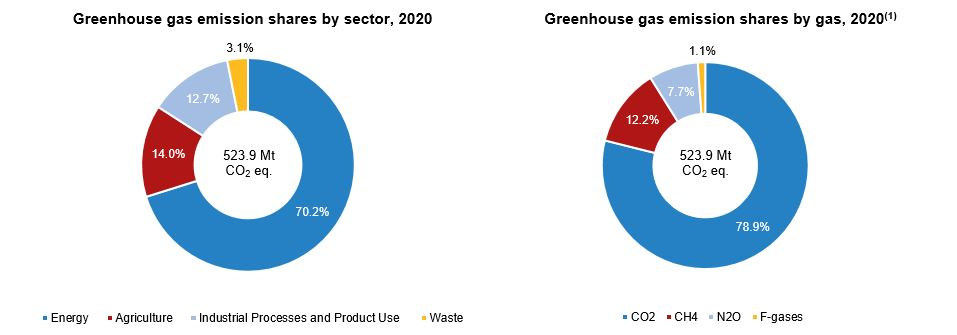

### Check for required variables

We first use the [require_variable()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.require_variable) function to assert that the scenarios contain data for the expected timeseries.

In [133]:
df.require_data?

In [134]:
df.require_data(variable='Primary Energy', year=2040)

,model,scenario
0,Akalın et al. (2012),Baseline
1,Akalın et al. (2012),Optimistic
2,Akalın et al. (2012),Pessimistic
3,Calikoglu and Koksal (2023),Business-as-usual
4,Calikoglu and Koksal (2023),Mitigation
5,Calikoglu and Koksal (2023),Net-Zero
6,Güllü et al. (2023),Delayed Net-Zero
7,Güllü et al. (2023),Net-Zero
8,MoEF (2007),Baseline
9,MoEUCC (2023),Baseline


In [135]:
df.require_data(variable='Primary Energy', year=2050)

,model,scenario
0,Akalın et al. (2012),Baseline
1,Akalın et al. (2012),Optimistic
2,Akalın et al. (2012),Pessimistic
3,Calikoglu and Koksal (2023),Business-as-usual
4,Calikoglu and Koksal (2023),Mitigation
5,Calikoglu and Koksal (2023),Net-Zero
6,Difiglio et al. (2020),Alternative
7,Difiglio et al. (2020),Reference
8,Güllü et al. (2023),Delayed Net-Zero
9,Güllü et al. (2023),Net-Zero


### Use the `exclude_on_fail` feature to create a sub-selection of the scenario ensemble

Per default, the functions above only report how many scenarios or which data points do not satisfy the validation criteria above.
However, they also have an option to `exclude_on_fail`, which marks all scenarios failing the validation as `exclude=True` in the 'meta' table.
This feature can be particularly helpful when a user wants to perform a number of validation steps and then efficiently remove all scenarios violating any of the criteria as part of a scripted workflow.

We illustrate a simple validation workflow using the CO2 emissions. The next cell shows the trajectories of CO2 emissions across all scenarios.

The next two cells perform validation to exclude all scenarios that have implausibly low emissions in 2020 (i.e., unrealistic near-term behaviour) as well as those that do not reduce emissions over the modeling horizon (i.e., exceed a value of 600 MT CO2 in any year).

<Axes: title={'center': 'CO2 Emissions'}, xlabel='Year', ylabel='Mt CO2/yr'>

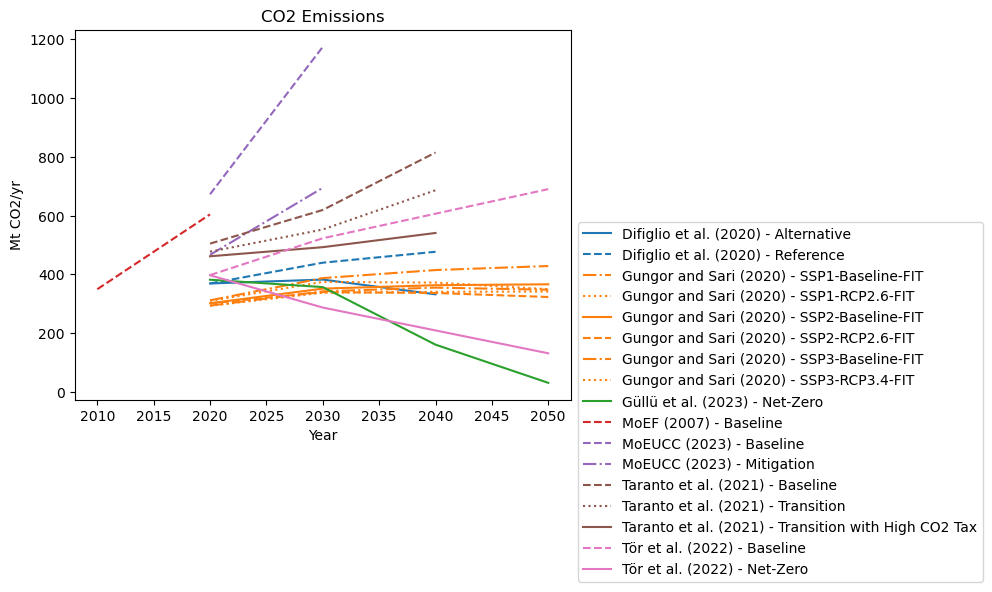

In [136]:
%%capture --no-display

df.filter(variable='Emissions|CO2').plot(color='model', title='CO2 Emissions',
                                         linestyle='scenario', legend={"loc":"outside right"})

We check the scenarios which have missing `Emissions|CO2` in the year `2020`. 

In [137]:
df.require_data(variable='Emissions|CO2', year=2020)

,model,scenario
0,Akalın et al. (2012),Baseline
1,Akalın et al. (2012),Optimistic
2,Akalın et al. (2012),Pessimistic
3,Calikoglu and Koksal (2023),Business-as-usual
4,Calikoglu and Koksal (2023),Mitigation
5,Calikoglu and Koksal (2023),Net-Zero
6,Güllü et al. (2023),Delayed Net-Zero
7,MENR (2022),CO2


In [138]:
df.validate(criteria={'Emissions|CO2': {'lo': 300, 'year': 2020}}, exclude_on_fail=True)

pyam.core - INFO: 2 of 1113 data points do not satisfy the criteria
pyam.core - INFO: 2 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,value
0,Gungor and Sari (2020),SSP1-Baseline-FIT,Turkey,Emissions|CO2,Mt CO2/yr,2020,293.826
1,Gungor and Sari (2020),SSP1-RCP2.6-FIT,Turkey,Emissions|CO2,Mt CO2/yr,2020,293.363


In [139]:
df.validate(criteria={'Emissions|CO2': {'up': 600}, 'year': 2020}, exclude_on_fail=True)

pyam.core - INFO: 8 of 1113 data points do not satisfy the criteria
pyam.core - INFO: 6 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,value
0,MoEF (2007),Baseline,Turkey,Emissions|CO2,Mt CO2/yr,2020,604.63
1,MoEUCC (2023),Baseline,Turkey,Emissions|CO2,Mt CO2/yr,2020,673.00
2,MoEUCC (2023),Baseline,Turkey,Emissions|CO2,Mt CO2/yr,2030,1175.00
3,MoEUCC (2023),Mitigation,Turkey,Emissions|CO2,Mt CO2/yr,2030,695.00
4,Taranto et al. (2021),Baseline,Turkey,Emissions|CO2,Mt CO2/yr,2030,619.60
5,Taranto et al. (2021),Baseline,Turkey,Emissions|CO2,Mt CO2/yr,2040,815.10
6,Taranto et al. (2021),Transition,Turkey,Emissions|CO2,Mt CO2/yr,2040,686.70
7,Tör et al. (2022),Baseline,Turkey,Emissions|CO2,Mt CO2/yr,2050,690.50


We can select all scenarios that have *not* been marked to be excluded by adding `exclude=False` to the [filter()](https://pyam-iamc.readthedocs.io/en/stable/api/iamdataframe.html#pyam.IamDataFrame.filter) statement.

To highlight the difference between the full scenario set and the reduced scenario set based on the validation exclusions, the next cell puts the two plots side by side with a shared y-axis.

In [140]:
plt.subplots?

<Axes: title={'center': 'CO2 Emissions (wo excluded)'}, xlabel='Year', ylabel='Mt CO2/yr'>

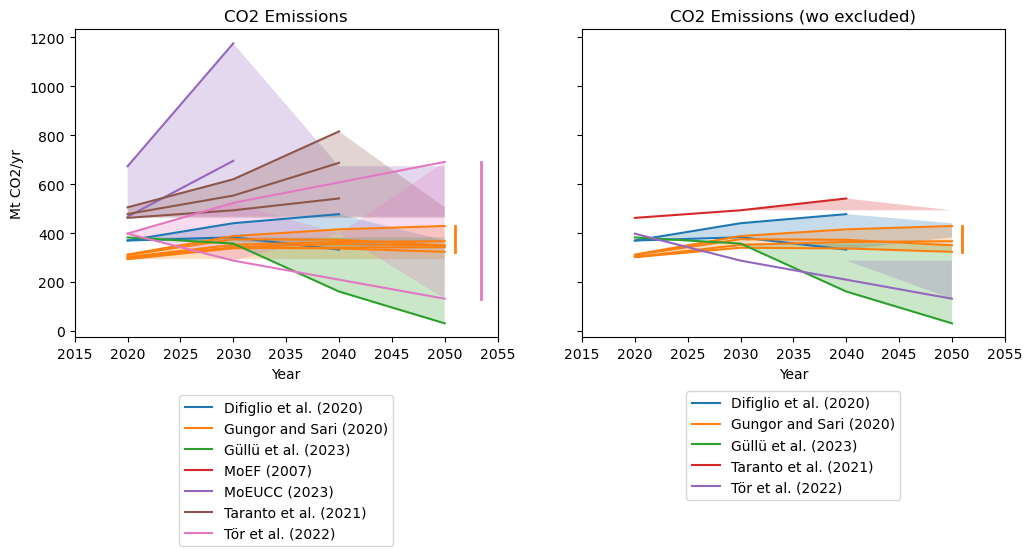

In [141]:
%%capture --no-display
from pyam.plotting import OUTSIDE_LEGEND
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
df_co2 = df.filter(variable='Emissions|CO2', year=range(2020,2060))
df_co2.plot(ax=ax[0],title='CO2 Emissions',color='model', fill_between=True, final_ranges=True,
            legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.7)))
df_co2.filter(exclude=False).plot(ax=ax[1],title='CO2 Emissions (wo excluded)',color='model', fill_between=True, final_ranges=True,
                                  legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.55)))

# Meta-analysis of scenarios

Although the fossil fuel reserves are modest in Turkey, their share in primary energy supply is above **80%** ([OECD Statistics](https://stats.oecd.org/fileview2.aspx?IDFile=0144c270-446f-48db-88f0-4ea1542244a5)). We categorize the scenarios according to the share of ``Primary Energy|Coal``.
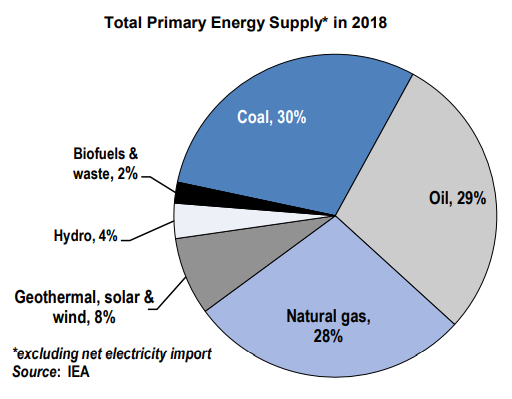

First, we subtract ``Primary Energy|Coal`` from total ``Primary Energy`` and draw a simple plot.

## Computing coal as a share of primary energy
Next, we can also compute the share of ``Primary Energy|Coal`` relative to total ``Primary Energy``, and again draw the plot.

In [142]:
df.divide("Primary Energy|Coal", "Primary Energy", "Share of coal", append=True)

In [143]:
df.set_meta(meta="above 30%", name="Share of coal")

We group the models and scenarios with share of coal less than `30%` in the meta-group `below 30%`.

In [144]:
df.require_data(variable='Share of coal', year=2040)

,model,scenario
0,Akalın et al. (2012),Baseline
1,Akalın et al. (2012),Optimistic
2,Akalın et al. (2012),Pessimistic
3,Calikoglu and Koksal (2023),Business-as-usual
4,Calikoglu and Koksal (2023),Mitigation
5,Calikoglu and Koksal (2023),Net-Zero
6,Güllü et al. (2023),Delayed Net-Zero
7,Güllü et al. (2023),Net-Zero
8,MoEF (2007),Baseline
9,MoEUCC (2023),Baseline


In [145]:
df.require_data?

In [146]:
df.require_data(variable='Share of coal', year=2050)

,model,scenario
0,Akalın et al. (2012),Baseline
1,Akalın et al. (2012),Optimistic
2,Akalın et al. (2012),Pessimistic
3,Calikoglu and Koksal (2023),Business-as-usual
4,Calikoglu and Koksal (2023),Mitigation
5,Calikoglu and Koksal (2023),Net-Zero
6,Difiglio et al. (2020),Alternative
7,Difiglio et al. (2020),Reference
8,Güllü et al. (2023),Delayed Net-Zero
9,Güllü et al. (2023),Net-Zero


We apply the `Share of coal` criteria in 2040 as the database includes more scenarios.

In [147]:
df.categorize(
    "Share of coal", "below 30%",
    criteria={"Share of coal": {"up": 0.3, 'year': 2040}},
)

pyam.core - INFO: 4 scenarios categorized as `Share of coal: below 30%`


In [148]:
df.filter(variable="Share of coal").timeseries()

2010  \
model                  scenario          region variable      unit            
Difiglio et al. (2020) Alternative       Turkey Share of coal           NaN   
                       Reference         Turkey Share of coal           NaN   
Gungor and Sari (2020) SSP1-Baseline-FIT Turkey Share of coal           NaN   
                       SSP1-RCP2.6-FIT   Turkey Share of coal           NaN   
                       SSP2-Baseline-FIT Turkey Share of coal           NaN   
                       SSP2-RCP2.6-FIT   Turkey Share of coal           NaN   
                       SSP3-Baseline-FIT Turkey Share of coal           NaN   
                       SSP3-RCP3.4-FIT   Turkey Share of coal           NaN   
MENR (2022)            CO2               Turkey Share of coal           NaN   
MoEF (2007)            Baseline          Turkey Share of coal       0.46507   

                                                                        2020  \
model                  scenario          region variable      unit             
Difiglio et al. (2020) Alternative       Turkey Share of coal       0.284123   
                       Reference         Turkey Share of coal       0.284123   
Gungor and Sari (2020) SSP1-Baseline-FIT Turkey Share of coal       0.266151   
                       SSP1-RCP2.6-FIT   Turkey Share of coal       0.265552   
                       SSP2-Baseline-FIT Turkey Share of coal       0.260059   
                       SSP2-RCP2.6-FIT   Turkey Share of coal       0.258697   
                       SSP3-Baseline-FIT Turkey Share of coal       0.259142   
                       SSP3-RCP3.4-FIT   Turkey Share of coal       0.256547   
MENR (2022)            CO2               Turkey Share of coal       0.275815   
MoEF (2007)            Baseline          Turkey Share of coal       0.437280   

                                                                        2030  \
model                  scenario          region variable      unit             
Difiglio et al. (2020) Alternative       Turkey Share of coal       0.239679   
                       Reference         Turkey Share of coal       0.282562   
Gungor and Sari (2020) SSP1-Baseline-FIT Turkey Share of coal       0.302506   
                       SSP1-RCP2.6-FIT   Turkey Share of coal       0.304187   
                       SSP2-Baseline-FIT Turkey Share of coal       0.295084   
                       SSP2-RCP2.6-FIT   Turkey Share of coal       0.300924   
                       SSP3-Baseline-FIT Turkey Share of coal       0.272853   
                       SSP3-RCP3.4-FIT   Turkey Share of coal       0.274270   
MENR (2022)            CO2               Turkey Share of coal       0.240704   
MoEF (2007)            Baseline          Turkey Share of coal            NaN   

                                                                        2040  \
model                  scenario          region variable      unit             
Difiglio et al. (2020) Alternative       Turkey Share of coal       0.128052   
                       Reference         Turkey Share of coal       0.219397   
Gungor and Sari (2020) SSP1-Baseline-FIT Turkey Share of coal       0.322857   
                       SSP1-RCP2.6-FIT   Turkey Share of coal       0.316043   
                       SSP2-Baseline-FIT Turkey Share of coal       0.319981   
                       SSP2-RCP2.6-FIT   Turkey Share of coal       0.314458   
                       SSP3-Baseline-FIT Turkey Share of coal       0.315882   
                       SSP3-RCP3.4-FIT   Turkey Share of coal       0.255438   
MENR (2022)            CO2               Turkey Share of coal       0.126557   
MoEF (2007)            Baseline          Turkey Share of coal            NaN   

                                                                        2050  
model                  scenario          region variable      unit            
Difiglio et al. (2020) Alternative       Turkey Share of coal            NaN  
  

In [149]:
df.meta[["exclude","Share of coal"]]

exclude  \
model                       scenario                                
Akalın et al. (2012)        Baseline                        False   
                            Optimistic                      False   
                            Pessimistic                     False   
Calikoglu and Koksal (2023) Business-as-usual               False   
                            Mitigation                      False   
                            Net-Zero                        False   
Difiglio et al. (2020)      Alternative                     False   
                            Reference                       False   
Gungor and Sari (2020)      SSP1-Baseline-FIT                True   
                            SSP1-RCP2.6-FIT                  True   
                            SSP2-Baseline-FIT               False   
                            SSP2-RCP2.6-FIT                 False   
                            SSP3-Baseline-FIT               False   
                            SSP3-RCP3.4-FIT                 False   
Güllü et al. (2023)         Delayed Net-Zero                False   
                            Net-Zero                        False   
MENR (2022)                 CO2                             False   
MoEF (2007)                 Baseline                         True   
MoEUCC (2023)               Baseline                         True   
                            Mitigation                       True   
Taranto et al. (2021)       Baseline                         True   
                            Transition                       True   
                            Transition with High CO2 Tax    False   
Tör et al. (2022)           Baseline                         True   
                            Net-Zero                        False   

                                                         Share of coal  
model                       scenario                                    
Akalın et al. (2012)        Baseline                         above 30%  
                            Optimistic                       above 30%  
                            Pessimistic                      above 30%  
Calikoglu and Koksal (2023) Business-as-usual                above 30%  
                            Mitigation                       above 30%  
                            Net-Zero                         above 30%  
Difiglio et al. (2020)      Alternative                      below 30%  
                            Reference                        below 30%  
Gungor and Sari (2020)      SSP1-Baseline-FIT                above 30%  
                            SSP1-RCP2.6-FIT                  above 30%  
                            SSP2-Baseline-FIT                above 30%  
                            SSP2-RCP2.6-FIT                  above 30%  
                            SSP3-Baseline-FIT                above 30%  
                            SSP3-RCP3.4-FIT                  below 30%  
Güllü et al. (2023)         Delayed Net-Zero                 above 30%  
                            Net-Zero                         above 30%  
MENR (2022)                 CO2                              below 30%  
MoEF (2007)                 Baseline                         above 30%  
MoEUCC (2023)               Baseline                         above 30%  
                            Mitigation                       above 30%  
Taranto et al. (2021)       Baseline                         above 30%  
                            Transition                       above 30%  
                            Transition with High CO2 Tax     above 30%  
Tör et al. (2022)           Baseline                         above 30%  
                            Net-Zero                         above 30%

### Comparison of `Primary Energy` data with CO2 emission forecasts

We can select all scenarios that have not been marked to be excluded by adding ```exclude=False``` to the ```filter()``` statement.

To highlight the difference between the full scenario set and the reduced scenario set based on the validation exclusions, the next cell puts the two plots side by side with a shared y-axis.

<Axes: title={'center': 'Primary Energy (wo excluded)'}, xlabel='Year', ylabel='EJ/yr'>

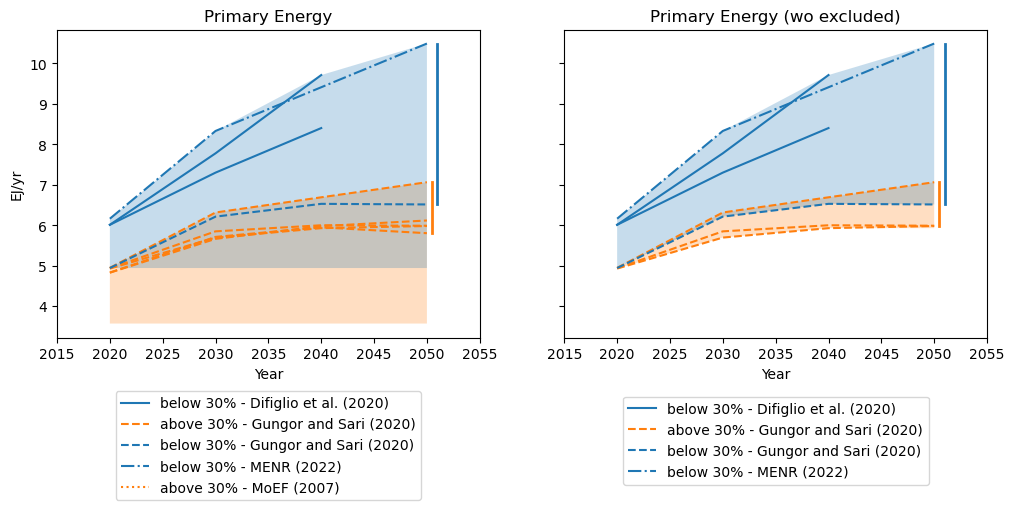

In [155]:
%%capture --no-display

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_pe = df.filter(variable="Primary Energy", year=range(2020,2060))

df_pe.plot(ax=ax[0], color="Share of coal", linestyle="model", fill_between=True, final_ranges=True,
           title="Primary Energy", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.55)))
df_pe.filter(exclude=False).plot(ax=ax[1], color="Share of coal", linestyle="model", fill_between=True, final_ranges=True,
           title="Primary Energy (wo excluded)", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.5)))

## Computing the share of solar and wind in `Secondary Energy|Electricity`
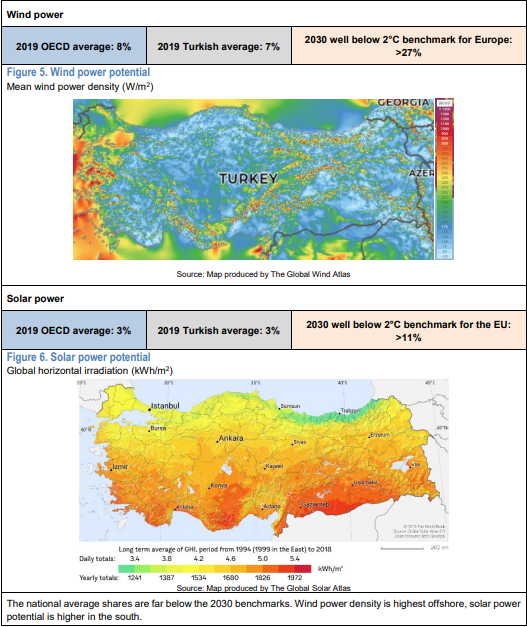

The net-zero target of Turkey largely depends on the massive penetration of low-carbon energy resources which can be deployed on a small and a large scale ([OECD](https://www.oecd.org/regional/RO2021%20Turkey.pdf)). 

In [156]:
df.add("Secondary Energy|Electricity|Solar",
       "Secondary Energy|Electricity|Wind","Secondary Energy|Electricity|Renewable",append=True)

In [157]:
df.filter(variable="Secondary Energy|Electricity|Renewable").timeseries()

2020  \
model                       scenario          region variable                               unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.128802   
                            Mitigation        Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.128802   
                            Net-Zero          Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.128802   
Difiglio et al. (2020)      Alternative       Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.111600   
                            Reference         Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.111600   
Gungor and Sari (2020)      SSP1-Baseline-FIT Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.016454   
                            SSP1-RCP2.6-FIT   Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.015861   
                            SSP2-Baseline-FIT Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.012400   
                            SSP2-RCP2.6-FIT   Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.016666   
                            SSP3-Baseline-FIT Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.015586   
                            SSP3-RCP3.4-FIT   Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.026856   
MENR (2022)                 CO2               Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.128880   
Taranto et al. (2021)       Baseline          Turkey Secondary Energy|Electricity|Renewable EJ/yr       NaN   
                            Transition        Turkey Secondary Energy|Electricity|Renewable EJ/yr       NaN   
Tör et al. (2022)           Net-Zero          Turkey Secondary Energy|Electricity|Renewable EJ/yr       NaN   

                                                                                                       2030  \
model                       scenario          region variable                               unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.309999   
                            Mitigation        Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.318987   
                            Net-Zero          Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.345950   
Difiglio et al. (2020)      Alternative       Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.336240   
                            Reference         Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.303480   
Gungor and Sari (2020)      SSP1-Baseline-FIT Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.015083   
                            SSP1-RCP2.6-FIT   Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.060057   
                            SSP2-Baseline-FIT Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.025050   
                            SSP2-RCP2.6-FIT   Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.123995   
                            SSP3-Baseline-FIT Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.010802   
                            SSP3-RCP3.4-FIT   Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.164837   
MENR (2022)                 CO2               Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.381240   
Taranto et al. (2021)       Baseline          Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.398290   
                            Transition        Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.452862   
Tör et al. (2022)           Net-Zero          Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.585000   

                                                                                                       2040  \
model                       scenario          region variable                               unit              
Calikoglu and Koksal (2023) Business-as-usual Turkey Secondary Energy|Electricity|Renewable EJ/yr  0.4739

In [158]:
df.divide("Secondary Energy|Electricity|Renewable", "Secondary Energy|Electricity", "Share of solar and wind", append=True)

In [159]:
df.set_meta(meta="below 10%", name="Share of solar and wind")

We group the models and scenarios with share of solar and wind more than `10%` in the meta-group `above 30%`.

In [160]:
df.categorize(
    "Share of solar and wind", "above 30%",
    criteria={"Share of solar and wind": {"lo": 0.3, 'year': 2040}},
)

pyam.core - INFO: 8 scenarios categorized as `Share of solar and wind: above 30%`


In [161]:
df.meta[["exclude","Share of solar and wind"]]

exclude  \
model                       scenario                                
Akalın et al. (2012)        Baseline                        False   
                            Optimistic                      False   
                            Pessimistic                     False   
Calikoglu and Koksal (2023) Business-as-usual               False   
                            Mitigation                      False   
                            Net-Zero                        False   
Difiglio et al. (2020)      Alternative                     False   
                            Reference                       False   
Gungor and Sari (2020)      SSP1-Baseline-FIT                True   
                            SSP1-RCP2.6-FIT                  True   
                            SSP2-Baseline-FIT               False   
                            SSP2-RCP2.6-FIT                 False   
                            SSP3-Baseline-FIT               False   
                            SSP3-RCP3.4-FIT                 False   
Güllü et al. (2023)         Delayed Net-Zero                False   
                            Net-Zero                        False   
MENR (2022)                 CO2                             False   
MoEF (2007)                 Baseline                         True   
MoEUCC (2023)               Baseline                         True   
                            Mitigation                       True   
Taranto et al. (2021)       Baseline                         True   
                            Transition                       True   
                            Transition with High CO2 Tax    False   
Tör et al. (2022)           Baseline                         True   
                            Net-Zero                        False   

                                                         Share of solar and wind  
model                       scenario                                              
Akalın et al. (2012)        Baseline                                   below 10%  
                            Optimistic                                 below 10%  
                            Pessimistic                                below 10%  
Calikoglu and Koksal (2023) Business-as-usual                          below 10%  
                            Mitigation                                 below 10%  
                            Net-Zero                                   above 30%  
Difiglio et al. (2020)      Alternative                                above 30%  
                            Reference                                  below 10%  
Gungor and Sari (2020)      SSP1-Baseline-FIT                          below 10%  
                            SSP1-RCP2.6-FIT                            above 30%  
                            SSP2-Baseline-FIT                          below 10%  
                            SSP2-RCP2.6-FIT                            above 30%  
                            SSP3-Baseline-FIT                          below 10%  
                            SSP3-RCP3.4-FIT                            above 30%  
Güllü et al. (2023)         Delayed Net-Zero                           below 10%  
                            Net-Zero                                   below 10%  
MENR (2022)                 CO2                                        below 10%  
MoEF (2007)                 Baseline                                   below 10%  
MoEUCC (2023)               Baseline                                   below 10%  
                            Mitigation                                 below 10%  
Taranto et al. (2021)       Baseline                                   above 30%  
                            Transition                                 above 30%  
                            Transition with High CO2 Tax               below 10%  
Tör et al. (2022)           Baseline                                   below 10%  
                            Net-Zero

### Comparison of `Secondary Energy|Electricity` data with CO2 emission forecasts

We can select all scenarios that have not been marked to be excluded by adding `exclude=False` to the `filter()` statement.

To highlight the difference between the full scenario set and the reduced scenario set based on the validation exclusions, the next cell puts the two plots side by side with a shared y-axis.

<Axes: title={'center': 'Renewable electricity from solar and wind (wo excluded)'}, xlabel='Year', ylabel='EJ/yr'>

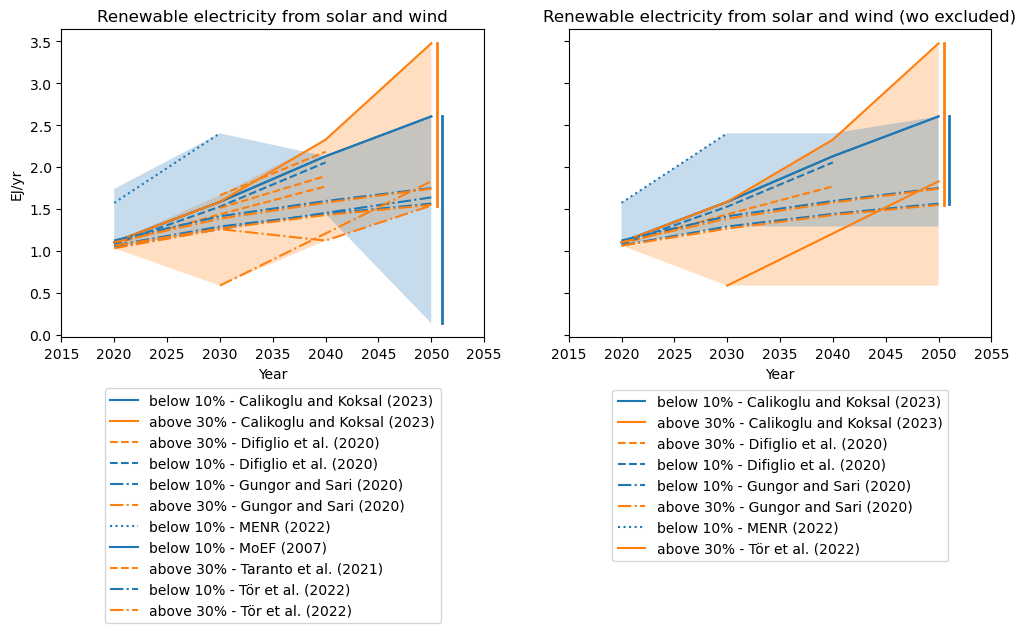

In [165]:
%%capture --no-display

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_se = df.filter(variable="Secondary Energy|Electricity", year=range(2020,2060))

df_se.plot(ax=ax[0], color="Share of solar and wind", linestyle="model", fill_between=True, final_ranges=True,
           title="Renewable electricity from solar and wind", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.95)))
df_se.filter(exclude=False).plot(ax=ax[1], color="Share of solar and wind", linestyle="model", fill_between=True, final_ranges=True,
           title="Renewable electricity from solar and wind (wo excluded)", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.75)))

## Comparing with IAM Databases
The national reports indicate limited data which can be populated with data from IAM databases.

In [166]:
conn = pyam.iiasa.Connection()
conn.valid_connections

httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/anonym/ "HTTP/1.1 200 OK"
pyam.iiasa - INFO: You are connected as an anonymous user
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications "HTTP/1.1 200 OK"


['ngfs_phase_3',
 'iamc15',
 'integration-test',
 'cdlinks',
 'india_scenario_hub',
 'genie',
 'hotspots',
 'ssp',
 'commit',
 'kopernikus_public',
 'nexus-basins',
 'ngfs_phase_4',
 'senses',
 'aqnea',
 'navigate',
 'climate_solutions',
 'eu-climate-advisory-board',
 'engage',
 'nca5',
 'openentrance',
 'ar6-public',
 'deeds',
 'ngfs_phase_2',
 'gei',
 'netzero2040',
 'ripples',
 'ecemf',
 'set_nav',
 'cmin',
 'ariadne',
 'paris_lttg']

In [167]:
conn = pyam.iiasa.Connection('ar6-public')

httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/anonym/ "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications "HTTP/1.1 200 OK"
httpx - INFO: HTTP Request: GET https://api.manager.ece.iiasa.ac.at/legacy/applications/IXSE_AR6_PUBLIC/config "HTTP/1.1 200 OK"
pyam.iiasa - INFO: You are connected to the IXSE_AR6_PUBLIC scenario explorer hosted by IIASA. If you use this data in any published format, please cite the data as provided in the explorer guidelines: https://data.ece.iiasa.ac.at/ar6/#/about
pyam.iiasa - INFO: You are connected as an anonymous user


In [168]:
models = conn.models()

In [169]:
models.head(10)

0          GENeSYS-MOD 1.0
1              AIM/CGE 2.2
2               COFFEE 1.1
3                 GCAM 5.3
4              GCAM-PR 5.3
5          IMACLIM-NLU 1.0
6                IMAGE 3.0
7                IMAGE 3.2
8    MESSAGEix-GLOBIOM 1.0
9    MESSAGEix-GLOBIOM_1.0
Name: model, dtype: object

In [170]:
variables = conn.variables()

In [171]:
variables.head(10)

0    AR6 climate diagnostics|Effective Radiative Fo...
1    AR6 climate diagnostics|Effective Radiative Fo...
2    AR6 climate diagnostics|Effective Radiative Fo...
3    AR6 climate diagnostics|Effective Radiative Fo...
4    AR6 climate diagnostics|Effective Radiative Fo...
5    AR6 climate diagnostics|Effective Radiative Fo...
6    AR6 climate diagnostics|Effective Radiative Fo...
7    AR6 climate diagnostics|Effective Radiative Fo...
8    AR6 climate diagnostics|Effective Radiative Fo...
9    AR6 climate diagnostics|Effective Radiative Fo...
Name: variable, dtype: object

In [172]:
df_iam = conn.query(
    variable=['Primary Energy', 'Primary Energy|Coal', 'Emissions|CO2'],
    region='Turkey'
)

In [173]:
list(df_iam.model)

['GEM-E3_V2021',
 'GENeSYS-MOD 2.9',
 'ICES-XPS 1.0',
 'IMAGE 3.0',
 'IMAGE 3.2',
 'POLES ENGAGE',
 'POLES GECO2019']

In [174]:
df_iam.head()

,model,scenario,region,variable,unit,year,value
0,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Emissions|CO2,Mt CO2/yr,2015,387.676620
1,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Emissions|CO2,Mt CO2/yr,2020,451.602620
2,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Emissions|CO2,Mt CO2/yr,2025,497.995078
3,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Emissions|CO2,Mt CO2/yr,2030,486.676887
4,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Emissions|CO2,Mt CO2/yr,2035,303.121743


### Use the `exclude_on_fail` feature to create a sub-selection of the scenario ensemble

We use the ```exclude_on_fail``` feature to seperate the data with too low or too high historical CO2 emissions.

In [175]:
df_iam.validate(criteria={'Emissions|CO2': {'lo': 300, 'year': 2020}}, exclude_on_fail=True)

pyam.core - INFO: 3 of 9859 data points do not satisfy the criteria
pyam.core - INFO: 3 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,value
0,GENeSYS-MOD 2.9,Directed Transition 1.0,Turkey,Emissions|CO2,Mt CO2/yr,2020,296.979358
1,GENeSYS-MOD 2.9,Gradual Development 1.0,Turkey,Emissions|CO2,Mt CO2/yr,2020,288.636051
2,GENeSYS-MOD 2.9,Techno-Friendly 1.0,Turkey,Emissions|CO2,Mt CO2/yr,2020,296.309344


In [176]:
df_iam.validate(criteria={'Emissions|CO2': {'up': 600}, 'year': 2020}, exclude_on_fail=True)

pyam.core - INFO: 82 of 9859 data points do not satisfy the criteria
pyam.core - INFO: 14 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,value
0,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2080,629.403105
1,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2095,672.340889
2,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2085,642.791542
3,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2075,612.977382
4,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2100,686.612150
...,...,...,...,...,...,...,...
77,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2045,790.588354
78,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2035,631.224757
79,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2070,702.589417
80,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2060,751.693410


<Axes: title={'center': 'CO2 Emissions (wo excluded)'}, xlabel='Year', ylabel='Mt CO2/yr'>

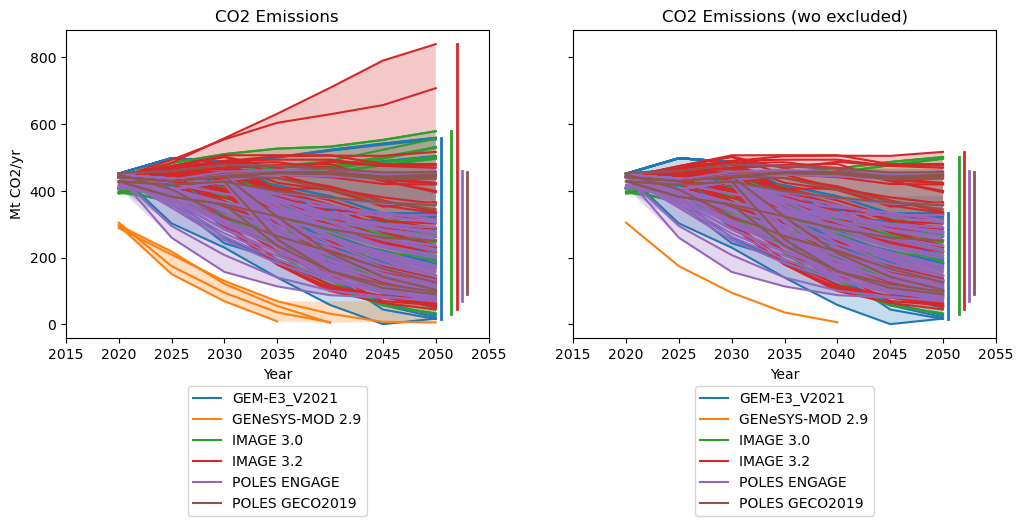

In [181]:
%%capture --no-display
fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)
df_iam_co2 = df_iam.filter(variable='Emissions|CO2', year=range(2020,2055))
df_iam_co2.plot(ax=ax[0],title='CO2 Emissions',color='model', fill_between=True, final_ranges=True,
            legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.6)))
df_iam_co2.filter(exclude=False).plot(ax=ax[1],title='CO2 Emissions (wo excluded)',color='model', fill_between=True, final_ranges=True,
                                  legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.6)))

### Computing coal as a share of primary energy
Next, we can also compute the share of ```Primary Energy|Coal``` relative to total ```Primary Energy```, and compare the plot with the previous plot illustrating the national modeling exercises.

In [182]:
df_iam.divide("Primary Energy|Coal", "Primary Energy", "Share of coal", append=True)

In [183]:
df_iam.set_meta(meta="above 30%", name="Share of coal")

In [184]:
df_iam.categorize(
    "Share of coal", "below 30%",
    criteria={"Share of coal": {"up": 0.3}},
)

pyam.core - INFO: 127 scenarios categorized as `Share of coal: below 30%`


In [185]:
df_iam.filter(variable="Share of coal").head()

,model,scenario,region,variable,unit,year,value
0,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Share of coal,,2015,0.229749
1,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Share of coal,,2020,0.318695
2,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Share of coal,,2025,0.291665
3,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Share of coal,,2030,0.269596
4,GEM-E3_V2021,EN_INDCi2030_1000,Turkey,Share of coal,,2035,0.118432


In [186]:
df_iam.meta[["exclude","Share of coal"]]

exclude Share of coal
model          scenario                                         
GEM-E3_V2021   EN_INDCi2030_1000             False     above 30%
               EN_INDCi2030_1000_COV         False     above 30%
               EN_INDCi2030_1000_COV_NDCp    False     above 30%
               EN_INDCi2030_1000_NDCp        False     above 30%
               EN_INDCi2030_1000f            False     above 30%
...                                            ...           ...
POLES GECO2019 CO_GPP                        False     below 30%
               CO_GPP_notax                  False     below 30%
               CO_NDC_2050convergence        False     below 30%
               CO_NDCplus                    False     below 30%
               NDCMCS                        False     below 30%

[209 rows x 2 columns]

<Axes: title={'center': 'Primary Energy (wo excluded)'}, xlabel='Year', ylabel='EJ/yr'>

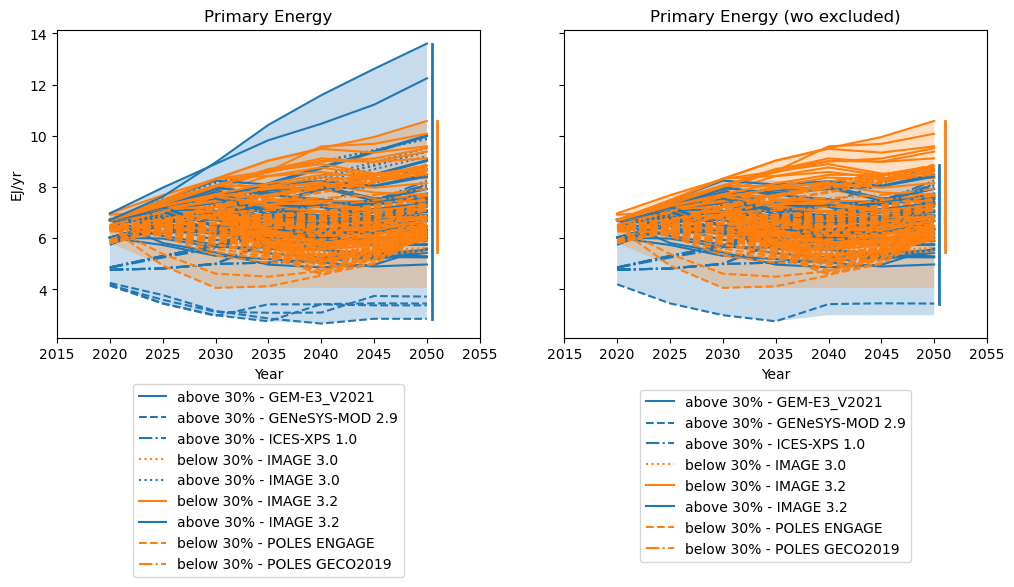

In [190]:
%%capture --no-display

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_iam_pe = df_iam.filter(variable="Primary Energy", year=range(2020,2055))

df_iam_pe.plot(ax=ax[0], color="Share of coal", linestyle="model", fill_between=True, final_ranges=True,
           title="Primary Energy", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.8)))
df_iam_pe.filter(exclude=False).plot(ax=ax[1], color="Share of coal", linestyle="model", fill_between=True, final_ranges=True,
           title="Primary Energy (wo excluded)", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.75)))

### Computing the share of renewable electricity from solar and wind

In [202]:
df_iam = conn.query(
    variable=['Secondary Energy|Electricity*', 'Emissions|CO2'],
    region='Turkey'
)

In [203]:
df_iam.add("Secondary Energy|Electricity|Solar",
       "Secondary Energy|Electricity|Wind","Secondary Energy|Electricity|Renewable",append=True)

In [211]:
df_iam.divide("Secondary Energy|Electricity|Renewable", "Secondary Energy|Electricity", "Share of solar and wind", append=True)

In [212]:
df_iam.set_meta(meta="below 10%", name="Share of solar and wind")

In [215]:
df_iam.categorize(
    "Share of solar and wind", "above 30%",
    criteria={"Share of solar and wind": {"lo": 0.3, 'year': 2040}},
)

pyam.core - INFO: 135 scenarios categorized as `Share of solar and wind: above 30%`


In [216]:
df_iam.meta[["exclude","Share of solar and wind"]]

exclude Share of solar and wind
model          scenario                                                   
GEM-E3_V2021   EN_INDCi2030_1000             False               above 30%
               EN_INDCi2030_1000_COV         False               above 30%
               EN_INDCi2030_1000_COV_NDCp    False               above 30%
               EN_INDCi2030_1000_NDCp        False               above 30%
               EN_INDCi2030_1000f            False               above 30%
...                                            ...                     ...
POLES GECO2019 CO_GPP                        False               above 30%
               CO_GPP_notax                  False               above 30%
               CO_NDC_2050convergence        False               above 30%
               CO_NDCplus                    False               above 30%
               NDCMCS                        False               above 30%

[209 rows x 2 columns]

In [218]:
df_iam.validate(criteria={'Emissions|CO2': {'lo': 300, 'year': 2020}}, exclude_on_fail=True)

pyam.core - INFO: 3 of 94843 data points do not satisfy the criteria
pyam.core - INFO: 3 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,value
0,GENeSYS-MOD 2.9,Directed Transition 1.0,Turkey,Emissions|CO2,Mt CO2/yr,2020,296.979358
1,GENeSYS-MOD 2.9,Gradual Development 1.0,Turkey,Emissions|CO2,Mt CO2/yr,2020,288.636051
2,GENeSYS-MOD 2.9,Techno-Friendly 1.0,Turkey,Emissions|CO2,Mt CO2/yr,2020,296.309344


In [219]:
df_iam.validate(criteria={'Emissions|CO2': {'up': 600}, 'year': 2020}, exclude_on_fail=True)

pyam.core - INFO: 82 of 94843 data points do not satisfy the criteria
pyam.core - INFO: 14 non-valid scenarios will be excluded


,model,scenario,region,variable,unit,year,value
0,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2080,629.403105
1,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2095,672.340889
2,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2085,642.791542
3,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2075,612.977382
4,GEM-E3_V2021,EN_INDCi2100,Turkey,Emissions|CO2,Mt CO2/yr,2100,686.612150
...,...,...,...,...,...,...,...
77,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2045,790.588354
78,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2035,631.224757
79,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2070,702.589417
80,IMAGE 3.2,SSP5-baseline,Turkey,Emissions|CO2,Mt CO2/yr,2060,751.693410


<Axes: title={'center': 'Renewable electricity from solar and wind (wo excluded)'}, xlabel='Year', ylabel='EJ/yr'>

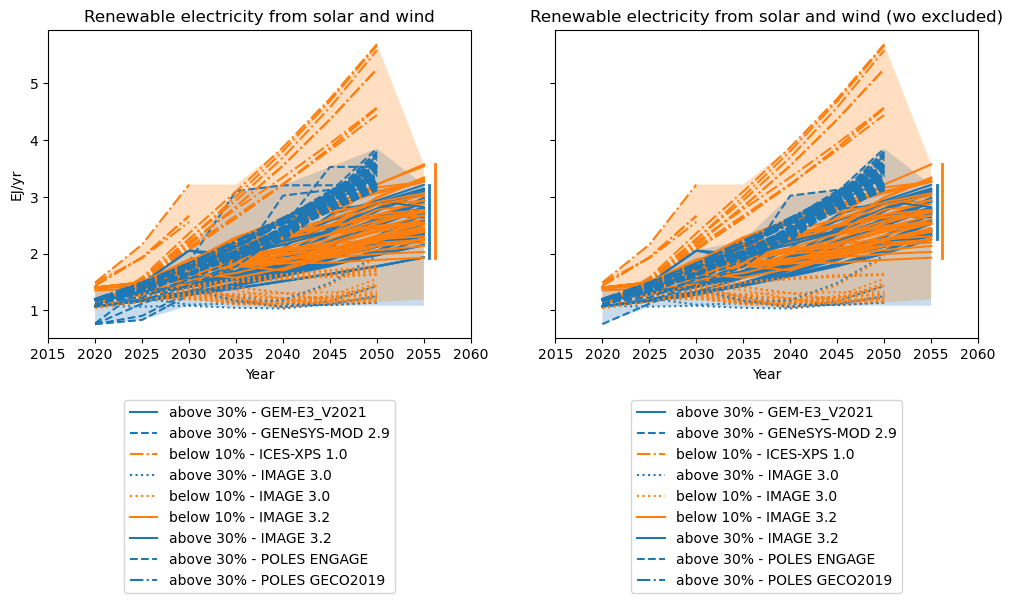

In [222]:
%%capture --no-display

fig, ax = plt.subplots(1, 2, figsize=(12, 4), sharey=True)

df_se = df_iam.filter(variable="Secondary Energy|Electricity", year=range(2020,2060))

df_se.plot(ax=ax[0], color="Share of solar and wind", linestyle="model", fill_between=True, final_ranges=True,
           title="Renewable electricity from solar and wind", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.85)))
df_se.filter(exclude=False).plot(ax=ax[1], color="Share of solar and wind", linestyle="model", fill_between=True, final_ranges=True,
           title="Renewable electricity from solar and wind (wo excluded)", legend=dict(loc='lower center', bbox_to_anchor=(0.5, -0.85)))

## Further steps

- Include data from recent academic (peer-reviewed) studies based on the net-zero target of Turkey
- Extract meta-data for emissions and related temperature increase using **MAGICC** emulator
- Develop a model for the low carbon transition of the electricity sector 
- Test the hypothesis for utilizing hydrogen and battery storage as a market solution for low carbon transition

## Questions?

Take a look at our [GitHub repository](https://github.com/gorkemgungormetu/turkish_energy_and_climate_pathways.git)!

In [175]:
df.to_excel('data_export.xlsx')

In [67]:
df_iam.to_excel('data_iam_export.xlsx')